In [1]:
!pip install geopandas
!pip install pysal

     |████████████████████████████████| 1.0 MB 27.8 MB/s 
     |████████████████████████████████| 6.3 MB 53.1 MB/s 
     |████████████████████████████████| 15.4 MB 45.7 MB/s 
     |████████████████████████████████| 2.4 MB 26.4 MB/s 
     |████████████████████████████████| 95 kB 3.3 MB/s 
     |████████████████████████████████| 60 kB 6.5 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 164 kB 42.1 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 
     |████████████████████████████████| 41 kB 544 kB/s 
     |████████████████████████████████| 209 kB 60.1 MB/s 
     |████████████████████████████████| 5.7 MB 61.7 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 138 kB 55.1 MB/s 
     |████████████████████████████████| 226 kB 43.4 MB/s 
     |████████████████████████████████| 269 kB 68.9 MB/s 
     |████████████████████████████████| 66.5 MB 103 kB/s 
     |███████████████████

In [2]:
#Foundational libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import geopandas as gp
#import cenpy as cen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#Needed for spatial statistics
import pysal.lib as libpysal
from libpysal import weights as sw #spatial weights
#I cannot use pysal.lib.weights, it just did not recognize, so I kind bypassed it 
from esda.moran import Moran, Moran_Local  #global & local Moran's I
from pysal.model import spreg #spatial regression module
from mgwr.gwr import GWR, MGWR #GWR & MGWR constructors
from mgwr.sel_bw import Sel_BW #bandwidth selection constructor
from mgwr.utils import compare_surfaces, truncate_colormap, shift_colormap
from splot.esda import lisa_cluster, plot_local_autocorrelation

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [5]:
%cd /content/drive/MyDrive/yuhao_MnM4SDS_project

/content/drive/MyDrive/yuhao_MnM4SDS_project


In [6]:
D2020= pd.read_csv('data_simply/2020.csv')
D2019= pd.read_csv('data_simply/2019.csv')
D2018= pd.read_csv('data_simply/2018.csv')
D2017= pd.read_csv('data_simply/2017.csv')
D2016= pd.read_csv('data_simply/2016.csv')


In [7]:
md=gp.read_file('data_simply/tl_2017_24_tract.shp')

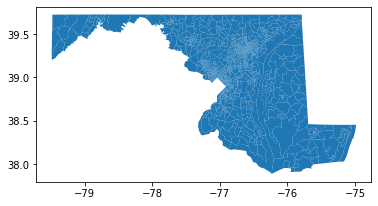

In [8]:
md.plot()

In [9]:
D2020_1=D2020.dropna()
D2019_1=D2019.dropna()
D2018_1=D2018.dropna()
D2017_1=D2017.dropna()
D2016_1=D2016.dropna()
D_merge=D2020.merge(D2019.merge(D2018.merge(D2017.merge(D2016))))

In [10]:
D_noNA=D_merge.dropna()

In [11]:
D_noNA['ID']=D_noNA['Name'].str[2:8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:

pd.set_option('display.max_columns', 200)

In [13]:
D_noNA

Name  \
0       CT000100, Allegany County, MD   
1        CT000100, Garrett County, MD   
2     CT000100, Washington County, MD   
3       CT000100, Wicomico County, MD   
4       CT000200, Allegany County, MD   
...                               ...   
1383  CT970500, Dorchester County, MD   
1384  CT970600, Dorchester County, MD   
1385  CT970702, Dorchester County, MD   
1386  CT970804, Dorchester County, MD   
1387  CT970900, Dorchester County, MD   

      # Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]  \
0                                                  1378                                          
1                                                   951                                          
2                                                   712                                          
3                                                  1264                                          
4                                                  1245                                          
...                                                 ...                                          
1383                                                746                                          
1384                                               1502                                          
1385                                                999                                          
1386                                                602                                          
1387                                                404                                          

      # Employment Status | In labor force, 2020 [Estimated]  \
0                                                  1646        
1                                                  1960        
2                                                  1776        
3                                                  3043        
4                                                  1203        
...                                                 ...        
1383                                               1107        
1384                                               2403        
1385                                               1994        
1386                                               1074        
1387                                                436        

      # Total Population, 2020 [Estimated]  \
0                                     3666   
1                                     3581   
2                                     3388   
3                                     6129   
4                                     3834   
...                                    ...   
1383                                  3533   
1384                                  4478   
1385                                  3951   
1386                                  2158   
1387                                  1124   

      # Vehicles Available | No vehicle available, 2020 [Estimated]  \
0                                                    94               
1                                                   114               
2                                                   121               
3                                                   354               
4                                                    16               
...                                                 ...               
1383                                                452               
1384                                                287               
1385                                                 69               
1386                                                 22               
1387                                                  0               

      # Vehicles Available | Occupied housing units, 2020 [Estimated]  \
0                                                  1546                 
1                                         

In [14]:
#gas price from EIA: yearly gas price for retail in mid-atlantic 
gas_price2020=2.369
gas_price2019=2.728
gas_price2018=2.861
gas_price2017=2.546
gas_price2016=2.247


In [15]:
#gas used each year from Transportation | Gasoline, other fuels, and motor oil (Household average)
D_noNA['Used_gas_2020']=D_noNA['Transportation | Gasoline, other fuels, and motor oil (Household average), 2020'].astype(float)/gas_price2020
D_noNA['Used_gas_2019']=D_noNA['Transportation | Gasoline, other fuels, and motor oil (Household average), 2019'].astype(float)/gas_price2019
D_noNA['Used_gas_2018']=D_noNA['Transportation | Gasoline, other fuels, and motor oil (Household average), 2018'].astype(float)/gas_price2018
D_noNA['Used_gas_2017']=D_noNA['Transportation | Gasoline and motor oil (Household average), 2017'].astype(float)/gas_price2017
D_noNA['Used_gas_2016']=D_noNA['Transportation | Gasoline and motor oil (Household average), 2016'].astype(float)/gas_price2016

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [16]:
D_noNA

Name  \
0       CT000100, Allegany County, MD   
1        CT000100, Garrett County, MD   
2     CT000100, Washington County, MD   
3       CT000100, Wicomico County, MD   
4       CT000200, Allegany County, MD   
...                               ...   
1383  CT970500, Dorchester County, MD   
1384  CT970600, Dorchester County, MD   
1385  CT970702, Dorchester County, MD   
1386  CT970804, Dorchester County, MD   
1387  CT970900, Dorchester County, MD   

      # Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]  \
0                                                  1378                                          
1                                                   951                                          
2                                                   712                                          
3                                                  1264                                          
4                                                  1245                                          
...                                                 ...                                          
1383                                                746                                          
1384                                               1502                                          
1385                                                999                                          
1386                                                602                                          
1387                                                404                                          

      # Employment Status | In labor force, 2020 [Estimated]  \
0                                                  1646        
1                                                  1960        
2                                                  1776        
3                                                  3043        
4                                                  1203        
...                                                 ...        
1383                                               1107        
1384                                               2403        
1385                                               1994        
1386                                               1074        
1387                                                436        

      # Total Population, 2020 [Estimated]  \
0                                     3666   
1                                     3581   
2                                     3388   
3                                     6129   
4                                     3834   
...                                    ...   
1383                                  3533   
1384                                  4478   
1385                                  3951   
1386                                  2158   
1387                                  1124   

      # Vehicles Available | No vehicle available, 2020 [Estimated]  \
0                                                    94               
1                                                   114               
2                                                   121               
3                                                   354               
4                                                    16               
...                                                 ...               
1383                                                452               
1384                                                287               
1385                                                 69               
1386                                                 22               
1387                                                  0               

      # Vehicles Available | Occupied housing units, 2020 [Estimated]  \
0                                                  1546                 
1                                         

In [17]:
#gas used each year from Transportation | Gasoline, other fuels, and motor oil (Household average)
D_noNA['Used_gas_2020_average_pop']=D_noNA['Used_gas_2020'].astype(float)/D_noNA['# Total Population, 2020 [Estimated]'].astype(float)
D_noNA['Used_gas_2019_average_pop']=D_noNA['Used_gas_2019'].astype(float)/D_noNA['# Total Population, 2019'].astype(float)
D_noNA['Used_gas_2018_average_pop']=D_noNA['Used_gas_2018'].astype(float)/D_noNA['# Total Population, 2018'].astype(float)
D_noNA['Used_gas_2017_average_pop']=D_noNA['Used_gas_2017'].astype(float)/D_noNA['# Total Population, 2017'].astype(float)
D_noNA['Used_gas_2016_average_pop']=D_noNA['Used_gas_2016'].astype(float)/D_noNA['# Total Population, 2016'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [18]:
D_test=D_noNA.dropna()

In [19]:
D_test

Name  \
0       CT000100, Allegany County, MD   
1        CT000100, Garrett County, MD   
2     CT000100, Washington County, MD   
3       CT000100, Wicomico County, MD   
4       CT000200, Allegany County, MD   
...                               ...   
1383  CT970500, Dorchester County, MD   
1384  CT970600, Dorchester County, MD   
1385  CT970702, Dorchester County, MD   
1386  CT970804, Dorchester County, MD   
1387  CT970900, Dorchester County, MD   

      # Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]  \
0                                                  1378                                          
1                                                   951                                          
2                                                   712                                          
3                                                  1264                                          
4                                                  1245                                          
...                                                 ...                                          
1383                                                746                                          
1384                                               1502                                          
1385                                                999                                          
1386                                                602                                          
1387                                                404                                          

      # Employment Status | In labor force, 2020 [Estimated]  \
0                                                  1646        
1                                                  1960        
2                                                  1776        
3                                                  3043        
4                                                  1203        
...                                                 ...        
1383                                               1107        
1384                                               2403        
1385                                               1994        
1386                                               1074        
1387                                                436        

      # Total Population, 2020 [Estimated]  \
0                                     3666   
1                                     3581   
2                                     3388   
3                                     6129   
4                                     3834   
...                                    ...   
1383                                  3533   
1384                                  4478   
1385                                  3951   
1386                                  2158   
1387                                  1124   

      # Vehicles Available | No vehicle available, 2020 [Estimated]  \
0                                                    94               
1                                                   114               
2                                                   121               
3                                                   354               
4                                                    16               
...                                                 ...               
1383                                                452               
1384                                                287               
1385                                                 69               
1386                                                 22               
1387                                                  0               

      # Vehicles Available | Occupied housing units, 2020 [Estimated]  \
0                                                  1546                 
1                                         

In [20]:
D_Shp=md.merge(D_test,right_on='ID',left_on='TRACTCE')

In [21]:
D_Shp=D_Shp.drop(columns=['NAME','NAMELSAD','MTFCC','FUNCSTAT','ALAND','AWATER','INTPTLAT','INTPTLON','STATEFP','TRACTCE'])

In [22]:
D_Shp['EduDiff_2020_2019']=D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]']-D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2019']
D_Shp['EduDiff_2019_2018']=D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2019']-D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2018']
D_Shp['EduDiff_2018_2017']=D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2018']-D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2017']
D_Shp['EduDiff_2017_2016']=D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2017']-D_Shp['# Educational Attainment | High school graduate (includes equivalency), 2016']


In [229]:
D_Shp['GasDiff_2020_2019']=D_Shp['Used_gas_2020']-D_Shp['Used_gas_2019']
D_Shp['GasDiff_2019_2018']=D_Shp['Used_gas_2019']-D_Shp['Used_gas_2018']
D_Shp['GasDiff_2018_2017']=D_Shp['Used_gas_2018']-D_Shp['Used_gas_2017']
D_Shp['GasDiff_2017_2016']=D_Shp['Used_gas_2017']-D_Shp['Used_gas_2016']
D_Shp['GasDiff_2020_2016']=D_Shp['Used_gas_2020']-D_Shp['Used_gas_2016']

In [24]:
D_Shp['NoVDiff_2020_2019']=D_Shp['# Vehicles Available | No vehicle available, 2020 [Estimated]']-D_Shp['# Vehicles Available | No vehicle available, 2019']
D_Shp['NoVDiff_2019_2018']=D_Shp['# Vehicles Available | No vehicle available, 2019']-D_Shp['# Vehicles Available | No vehicle available, 2018']
D_Shp['NoVDiff_2018_2017']=D_Shp['# Vehicles Available | No vehicle available, 2018']-D_Shp['# Vehicles Available | No vehicle available, 2017']
D_Shp['NoVDiff_2017_2016']=D_Shp['# Vehicles Available | No vehicle available, 2017']-D_Shp['# Vehicles Available | No vehicle available, 2016']

In [242]:
D_Shp['EmploymentDiff_2020_2019']=D_Shp['% Employment Status | In labor force, 2020 [Estimated]']-D_Shp['% Employment Status | In labor force, 2019']
#D_Shp['EmploymentDiff_2019_2018']=D_Shp['% Employment Status | In labor force, 2019']-D_Shp['% Employment Status | In labor force, 2018']
#D_Shp['EmploymentDiff_2018_2017']=D_Shp['% Employment Status | In labor force, 2018']-D_Shp['% Employment Status | In labor force, 2017']
D_Shp['EmploymentDiff_2017_2016']=D_Shp['% Employment Status | In labor force, 2017']-D_Shp['% Employment Status | In labor force, 2016']
D_Shp['EmploymentDiff_2020_2016']=D_Shp['# Employment Status | In labor force, 2020 [Estimated]']-D_Shp['# Employment Status | In labor force, 2016']


In [26]:
D_Shp['PublicDiff_2020_2019']=D_Shp['% Transportation to Work |  Public transportation, 2020 [Estimated]']-D_Shp['% Transportation to Work |  Public transportation, 2019 [Estimated]']
D_Shp['PublicDiff_2019_2018']=D_Shp['% Transportation to Work |  Public transportation, 2019 [Estimated]']-D_Shp['% Transportation to Work |  Public transportation, 2018']
D_Shp['PublicDiff_2018_2017']=D_Shp['% Transportation to Work |  Public transportation, 2018']-D_Shp['% Transportation to Work |  Public transportation, 2017']
D_Shp['PublicDiff_2017_2016']=D_Shp['% Transportation to Work |  Public transportation, 2017']-D_Shp['% Transportation to Work |  Public transportation, 2016']

In [27]:
D_Shp['CarDiff_2020_2019']=D_Shp['% Transportation to Work | Car, truck, or van, 2020 [Estimated]']-D_Shp['% Transportation to Work | Car, truck, or van, 2019 [Estimated]']
D_Shp['CarDiff_2019_2018']=D_Shp['% Transportation to Work | Car, truck, or van, 2019 [Estimated]']-D_Shp['% Transportation to Work | Car, truck, or van, 2018']
D_Shp['CarDiff_2018_2017']=D_Shp['% Transportation to Work | Car, truck, or van, 2018']-D_Shp['% Transportation to Work | Car, truck, or van, 2017']
D_Shp['CarDiff_2017_2016']=D_Shp['% Transportation to Work | Car, truck, or van, 2017']-D_Shp['% Transportation to Work | Car, truck, or van, 2016']

In [28]:
D_Shp['WFHDiff_2020_2019']=D_Shp['% Transportation to Work | Worked at home, 2020 [Estimated]']-D_Shp['% Transportation to Work | Worked at home, 2019 [Estimated]']
D_Shp['WFHDiff_2019_2018']=D_Shp['% Transportation to Work | Worked at home, 2019 [Estimated]']-D_Shp['% Transportation to Work | Worked at home, 2018']
D_Shp['WFHDiff_2018_2017']=D_Shp['% Transportation to Work | Worked at home, 2018']-D_Shp['% Transportation to Work | Worked at home, 2017']
D_Shp['WFHDiff_2017_2016']=D_Shp['% Transportation to Work | Worked at home, 2017']-D_Shp['% Transportation to Work | Worked at home, 2016']

In [29]:
D_Shp['ExpendituresDiff_2020_2019']=D_Shp['Average annual expenditures (Household average), 2020']-D_Shp['Average annual expenditures (Household average), 2019']
D_Shp['ExpendituresDiff_2019_2018']=D_Shp['Average annual expenditures (Household average), 2019']-D_Shp['Average annual expenditures (Household average), 2018']
D_Shp['ExpenditurestDiff_2018_2017']=D_Shp['Average annual expenditures (Household average), 2018']-D_Shp['Average annual expenditures (Household average), 2017']
D_Shp['ExpenditurestDiff_2017_2016']=D_Shp['Average annual expenditures (Household average), 2017']-D_Shp['Average annual expenditures (Household average), 2016']


In [30]:
D_Shp['HousingDiff_2020_2019']=D_Shp['Housing | Utilities, fuels, and public services (Household average), 2020']-D_Shp['Housing | Utilities, fuels, and public services (Household average), 2019']
D_Shp['HousingDiff_2019_2018']=D_Shp['Housing | Utilities, fuels, and public services (Household average), 2019']-D_Shp['Housing | Utilities, fuels, and public services (Household average), 2018']
D_Shp['HousingDiff_2018_2017']=D_Shp['Housing | Utilities, fuels, and public services (Household average), 2018']-D_Shp['Housing | Utilities, fuels, and public services (Household average), 2017']
D_Shp['HousingDiff_2017_2016']=D_Shp['Housing | Utilities, fuels, and public services (Household average), 2017']-D_Shp['Housing | Utilities, fuels, and public services (Household average), 2016']


In [31]:
D_Shp['OnlineShoppingDiff_2020_2019']=D_Shp['% Purchasing: By Internet: In last 12 months: Food (Groceries), 2020']-D_Shp['% Purchasing: By Internet: In last 12 months: Food/Groceries, 2019']
D_Shp['OnlineShoppingDiff_2019_2018']=D_Shp['% Purchasing: By Internet: In last 12 months: Food/Groceries, 2019']-D_Shp['% Purchasing: By Internet: In last 12 months: Food/Groceries, 2018']
D_Shp['OnlineShoppingDiff_2018_2017']=D_Shp['% Purchasing: By Internet: In last 12 months: Food/Groceries, 2018']-D_Shp['% Purchasing: By Mail/Phone: In last 12 months: Food/Groceries, 2017']
D_Shp['OnlineShoppingDiff_2017_2016']=D_Shp['% Purchasing: By Mail/Phone: In last 12 months: Food/Groceries, 2017']-D_Shp['% Purchasing: By Internet: In last 12 months: Food/Groceries, 2016']

In [238]:
D_Shp['IncomeDiff_2020_2019']=D_Shp['Median Household Income, 2020 [Estimated]']-D_Shp['Median Household Income, 2019']
D_Shp['IncomeDiff_2019_2018']=D_Shp['Median Household Income, 2019']-D_Shp['Median Household Income, 2018']
D_Shp['IncomeDiff_2018_2017']=D_Shp['Median Household Income, 2018']-D_Shp['Median Household Income, 2017']
D_Shp['IncomeDiff_2017_2016']=D_Shp['Median Household Income, 2017']-D_Shp['Median Household Income, 2016']
D_Shp['IncomeDiff_2020_2016']=D_Shp['Median Household Income, 2020 [Estimated]']-D_Shp['Median Household Income, 2016']


In [33]:
D_Shp['Sadnesss_2020']=D_Shp[ '% Sadness - Some of the time, 2020']+D_Shp['% Sadness- All or most of the time, 2020']
D_Shp['Sadnesss_2019']=D_Shp[ '% Sadness - Some of the time, 2019']+D_Shp['% Sadness- All or most of the time, 2019']
D_Shp['Sadnesss_2018']=D_Shp[ '% Sadness - Some of the time, 2018']+D_Shp['% Sadness- All or most of the time, 2018']
D_Shp['Sadnesss_2017']=D_Shp[ '% Sadness - Some of the time, 2017']+D_Shp['% Sadness- All or most of the time, 2017']
D_Shp['Sadnesss_2016']=D_Shp[ '% Sadness - Some of the time, 2016']+D_Shp['% Sadness- All or most of the time, 2016']


In [233]:
D_Shp['SadnesssDiff_2020_2019']=D_Shp[ 'Sadnesss_2020']+D_Shp['Sadnesss_2019']
D_Shp['SadnesssDiff_2020_2016']=D_Shp[ 'Sadnesss_2020']+D_Shp['Sadnesss_2016']


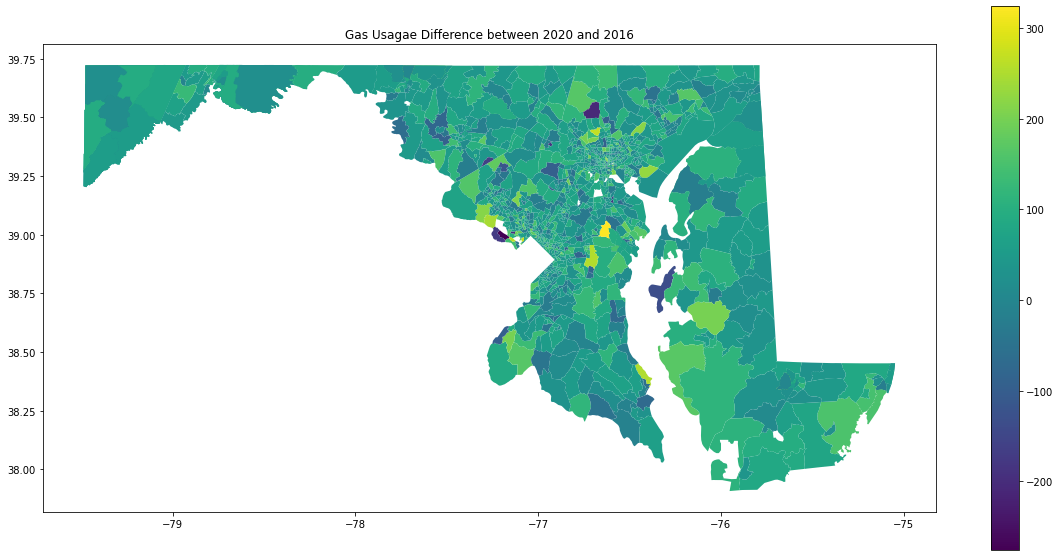

In [232]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Gas Usagae Difference between 2020 and 2016')
D_Shp.plot('GasDiff_2020_2016', legend=True, ax=ax)

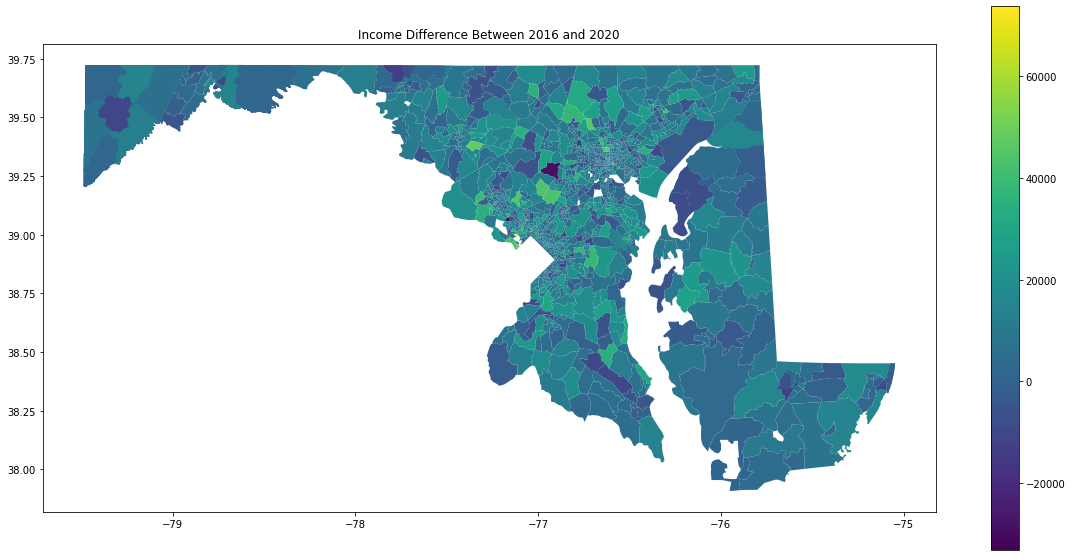

In [239]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Income Difference Between 2016 and 2020')
D_Shp.plot('IncomeDiff_2020_2016', legend=True, ax=ax)

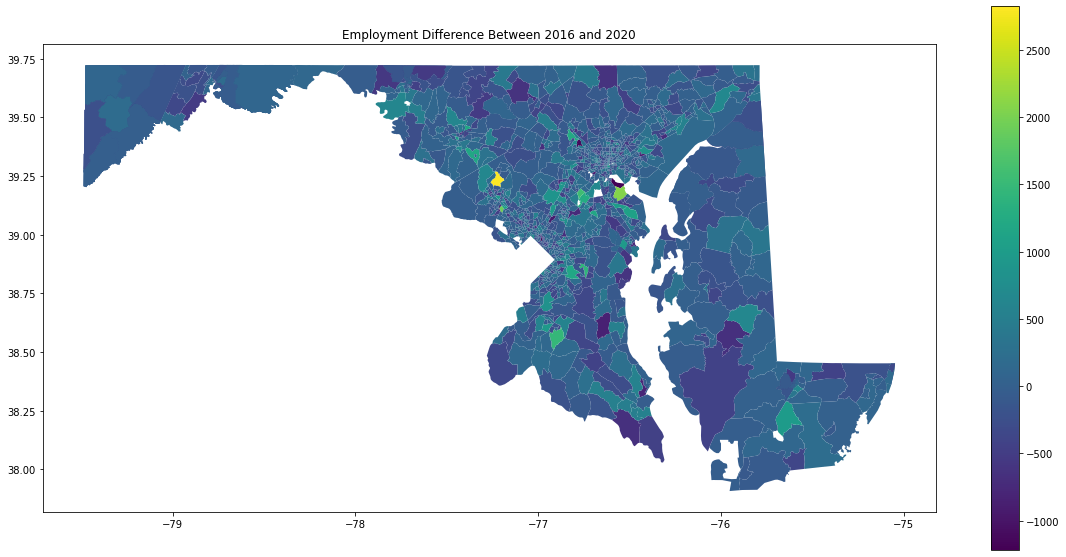

In [244]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Employment Difference Between 2016 and 2020')
D_Shp.plot('EmploymentDiff_2020_2016', legend=True, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Mental health : Sadness Increase from 2016 to 2020')
D_Shp.plot('SadnesssDiff_2020_2016', legend=True, ax=ax)

In [36]:
import pandas as pd
from sklearn import preprocessing
x_no= D_Shp[['COUNTYFP','GEOID','geometry','Name']]
x = D_Shp.drop(columns=['COUNTYFP','GEOID','geometry','Name']).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled,columns=D_Shp.drop(columns=['COUNTYFP','GEOID','geometry','Name']).columns.tolist()[:])
D_Shp_1=pd.concat([x_no, df], axis=1)

In [ ]:
D_Shp_1.columns.tolist()


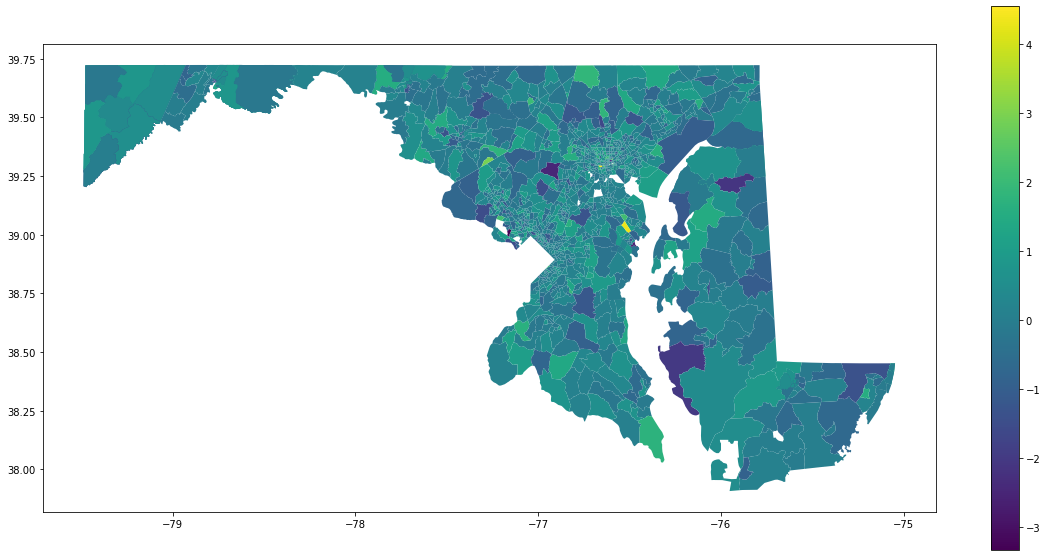

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
D_Shp.plot('WFHDiff_2020_2019', legend=True, ax=ax)

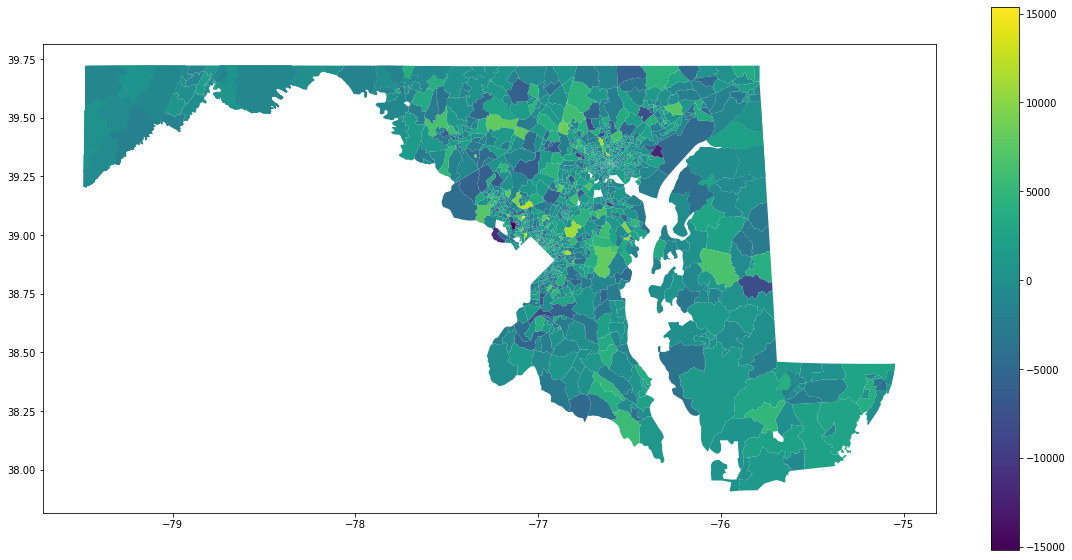

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
D_Shp.plot('IncomeDiff_2020_2019', legend=True, ax=ax)

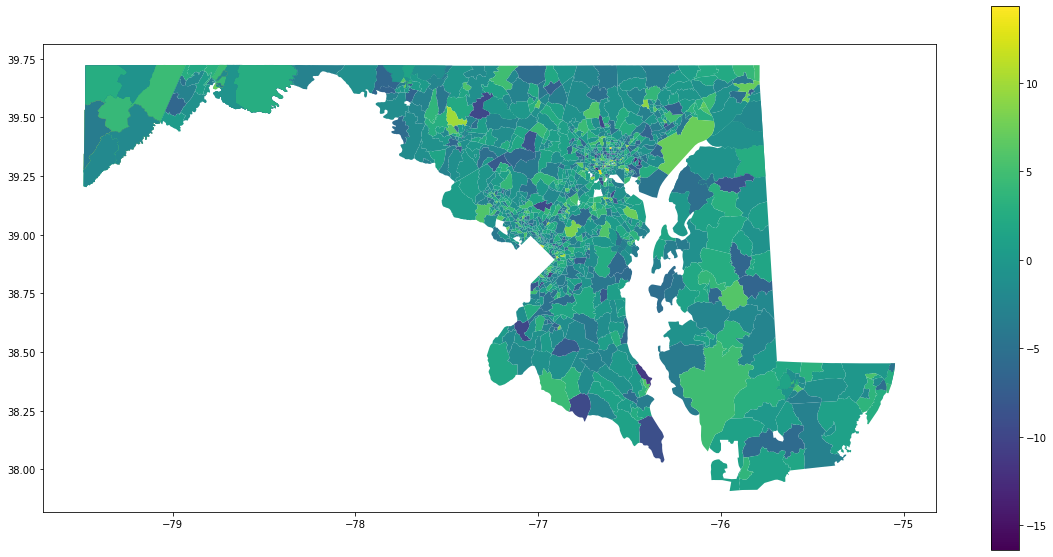

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
D_Shp.plot('EmploymentDiff_2020_2019', legend=True, ax=ax)

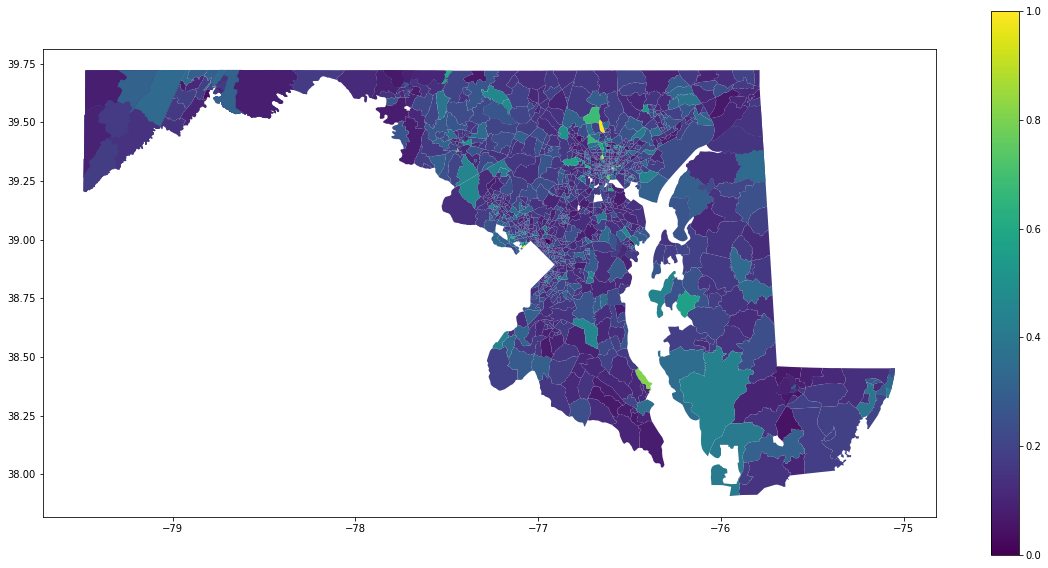

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Used_gas_2016_average_pop', legend=True, ax=ax)

In [43]:
cols_2020_input_gas = [ 
 '% Transportation to Work | Worked at home, 2020 [Estimated]',
 '% Transportation to Work |  Public transportation, 2020 [Estimated]',
 'Median Household Income, 2020 [Estimated]',
 '% Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]',
 '% Vehicles Available | No vehicle available, 2020 [Estimated]',
 '% Poverty Status by Age | In Poverty, 2020 [Estimated]',

 ]

In [44]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2020_input_gas].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2020_input_gas].values, i)
                          for i in range(len(D_Shp_1[cols_2020_input_gas].columns))]
  
print(vif_data)

                                             feature       VIF
0  % Transportation to Work | Worked at home, 202...  2.979576
1  % Transportation to Work |  Public transportat...  2.829596
2          Median Household Income, 2020 [Estimated]  3.966830
3  % Educational Attainment | High school graduat...  3.714985
4  % Vehicles Available | No vehicle available, 2...  4.936511
5  % Poverty Status by Age | In Poverty, 2020 [Es...  4.652689


In [45]:
model_gas2020 = sm.OLS(D_Shp_1['Used_gas_2020'].to_numpy(),sm.add_constant( D_Shp_1[cols_2020_input_gas].to_numpy()))
results_gas2020 = model_gas2020.fit()
cols_2020_input_gas_name=['const', 
 '% Transportation to Work | Worked at home, 2020 [Estimated]',
 '% Transportation to Work |  Public transportation, 2020 [Estimated]',
 'Median Household Income, 2020 [Estimated]',
 '% Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]',
 '% Vehicles Available | No vehicle available, 2020 [Estimated]',
 '% Poverty Status by Age | In Poverty, 2020 [Estimated]',
]

results_gas2020.summary(xname=cols_2020_input_gas_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     836.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:58:59   Log-Likelihood:                 2552.5
No. Observations:                1492   AIC:                            -5091.
Df Residuals:                    1485   BIC:                            -5054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.2890      0.007     43.047      0.000       0.276       0.302
% Transportation to Work | Worked at home, 2020 [Estimated]                                 -0.0011      0.013     -0.080      0.936      -0.027       0.025
% Transportation to Work |  Public transportation, 2020 [Estimated]                          0.0348      0.012      2.974      0.003       0.012       0.058
Median Household Income, 2020 [Estimated]                                                    0.4229      0.011     37.074      0.000       0.401       0.445
% Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]    -0.0575      0.007     -8.104      0.000      -0.071      -0.044
% Vehicles Available | No vehicle available, 2020 [Estimated]                                0.0200      0.013      1.500      0.134      -0.006       0.046
% Poverty Status by Age | In Poverty, 2020 [Estimated]                                      -0.0431      0.015     -2.871      0.004      -0.073      -0.014
==============================================================================
Omnibus:                      881.416   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35973.593
Skew:                          -2.111   Prob(JB):                         0.00
Kurtosis:                      26.682   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
D_Shp_1['Gas_2020_residual']=results_gas2020.resid

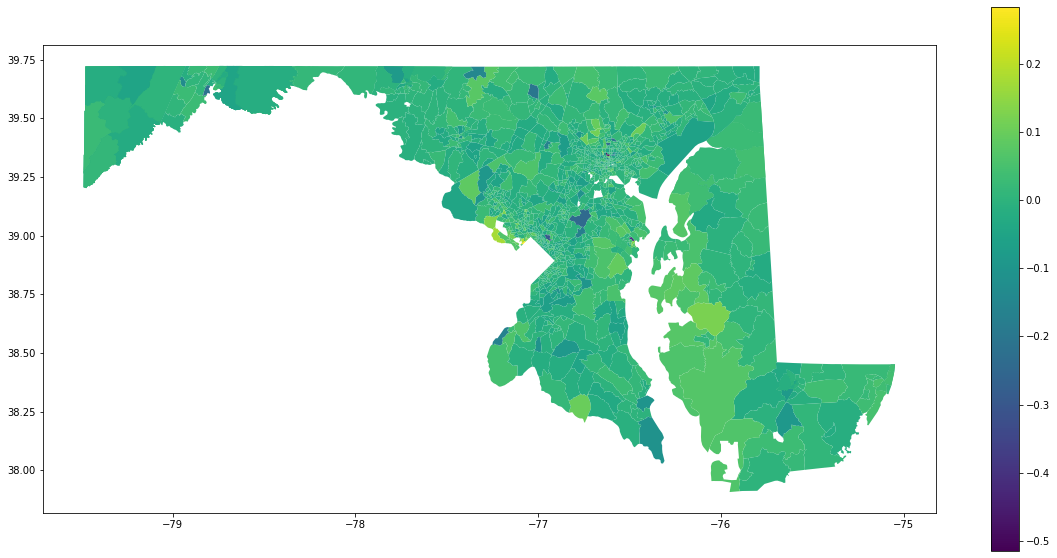

In [47]:
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Gas_2020_residual', legend=True, ax=ax)

In [48]:
w = sw.Queen.from_dataframe(D_Shp_1)


/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))


In [49]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Gas_2020_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.13826668940722917 0.001


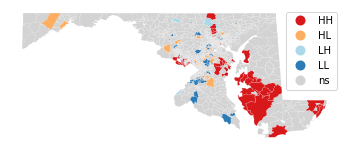

In [50]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Gas_2020_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [51]:
cols_2020_input_sad=[
 '% Transportation to Work |  Public transportation, 2020 [Estimated]',
 '% Transportation to Work | Worked at home, 2020 [Estimated]', 'Population Density (per square mile), 2020 [Estimated]',
 '# Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]',
 '# Vehicles Available | No vehicle available, 2020 [Estimated]',
 '% Employment Status | In labor force, 2020 [Estimated]',
 '% Poverty Status by Age | In Poverty, 2020 [Estimated]',

 ]

In [52]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2020_input_sad].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2020_input_sad].values, i)
                          for i in range(len(D_Shp_1[cols_2020_input_sad].columns))]
  
print(vif_data)

                                             feature       VIF
0  % Transportation to Work |  Public transportat...  2.927120
1  % Transportation to Work | Worked at home, 202...  2.394444
2  Population Density (per square mile), 2020 [Es...  3.146627
3  # Educational Attainment | High school graduat...  4.062867
4  # Vehicles Available | No vehicle available, 2...  3.040242
5  % Employment Status | In labor force, 2020 [Es...  7.299001
6  % Poverty Status by Age | In Poverty, 2020 [Es...  2.804152


In [53]:
D_Shp_1

COUNTYFP        GEOID                                           geometry  \
0         005  24005403100  POLYGON ((-76.74491 39.35986, -76.74431 39.359...   
1         005  24005403201  POLYGON ((-76.73369 39.36204, -76.73290 39.362...   
2         033  24033807304  POLYGON ((-76.97171 39.01858, -76.97164 39.018...   
3         033  24033807305  POLYGON ((-76.97728 39.01095, -76.97714 39.011...   
4         033  24033807405  POLYGON ((-76.94986 39.02208, -76.94944 39.024...   
...       ...          ...                                                ...   
1487      033  24033803001  POLYGON ((-76.92360 38.90400, -76.92192 38.904...   
1488      033  24033803002  POLYGON ((-76.90195 38.90747, -76.90154 38.907...   
1489      033  24033803200  POLYGON ((-76.91518 38.91711, -76.91394 38.917...   
1490      033  24033803401  POLYGON ((-76.87908 38.91957, -76.87874 38.919...   
1491      033  24033803402  POLYGON ((-76.89208 38.90958, -76.89133 38.910...   

                                      Name  \
0           CT403100, Baltimore County, MD   
1           CT403201, Baltimore County, MD   
2     CT807304, Prince George's County, MD   
3     CT807305, Prince George's County, MD   
4     CT807405, Prince George's County, MD   
...                                    ...   
1487  CT803001, Prince George's County, MD   
1488  CT803002, Prince George's County, MD   
1489  CT803200, Prince George's County, MD   
1490  CT803401, Prince George's County, MD   
1491  CT803402, Prince George's County, MD   

      # Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]  \
0                                              0.214182                                          
1                                              0.206946                                          
2                                              0.100217                                          
3                                              0.128075                                          
4                                              0.176194                                          
...                                                 ...                                          
1487                                           0.316932                                          
1488                                           0.218886                                          
1489                                           0.257598                                          
1490                                           0.126990                                          
1491                                           0.353835                                          

      # Employment Status | In labor force, 2020 [Estimated]  \
0                                              0.120102        
1                                              0.210879        
2                                              0.152592        
3                                              0.247505        
4                                              0.426868        
...                                                 ...        
1487                                           0.188489        
1488                                           0.191044        
1489                                           0.202361        
1490                                           0.095765        
1491                                           0.208810        

      # Total Population, 2020 [Estimated]  \
0                                 0.140399   
1                                 0.200936   
2                                 0.126963   
3                                 0.208786   
4                                 0.334390   
...                                    ...   
1487                              0.184179   
1488                              0.136624   
1489                              0.166214   
1490                              0.049743   
1491                       

In [54]:
model_sad2020 = sm.OLS(D_Shp_1['Sadnesss_2020'].to_numpy(),sm.add_constant( D_Shp_1[cols_2020_input_sad].to_numpy()))
results_sad2020 = model_sad2020.fit()
testVIF_name=['const', 
 '% Transportation to Work |  Public transportation, 2020 [Estimated]',
 '% Transportation to Work | Worked at home, 2020 [Estimated]', 'Population Density (per square mile), 2020 [Estimated]',
 '# Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]',
 '# Vehicles Available | No vehicle available, 2020 [Estimated]',
 '% Employment Status | In labor force, 2020 [Estimated]',
 '% Poverty Status by Age | In Poverty, 2020 [Estimated]',
]

results_sad2020.summary(xname=testVIF_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     387.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:59:11   Log-Likelihood:                 1179.5
No. Observations:                1492   AIC:                            -2343.
Df Residuals:                    1484   BIC:                            -2300.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.3723      0.021     17.371      0.000       0.330       0.414
% Transportation to Work |  Public transportation, 2020 [Estimated]                          0.0293      0.030      0.989      0.323      -0.029       0.088
% Transportation to Work | Worked at home, 2020 [Estimated]                                 -0.3455      0.032    -10.897      0.000      -0.408      -0.283
Population Density (per square mile), 2020 [Estimated]                                       0.1792      0.034      5.232      0.000       0.112       0.246
# Educational Attainment | High school graduate (includes equivalency), 2020 [Estimated]     0.0479      0.021      2.333      0.020       0.008       0.088
# Vehicles Available | No vehicle available, 2020 [Estimated]                                0.4488      0.041     10.832      0.000       0.367       0.530
% Employment Status | In labor force, 2020 [Estimated]                                      -0.2352      0.028     -8.503      0.000      -0.289      -0.181
% Poverty Status by Age | In Poverty, 2020 [Estimated]                                       0.7572      0.031     24.175      0.000       0.696       0.819
==============================================================================
Omnibus:                       70.889   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.807
Skew:                           0.446   Prob(JB):                     9.52e-22
Kurtosis:                       3.874   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

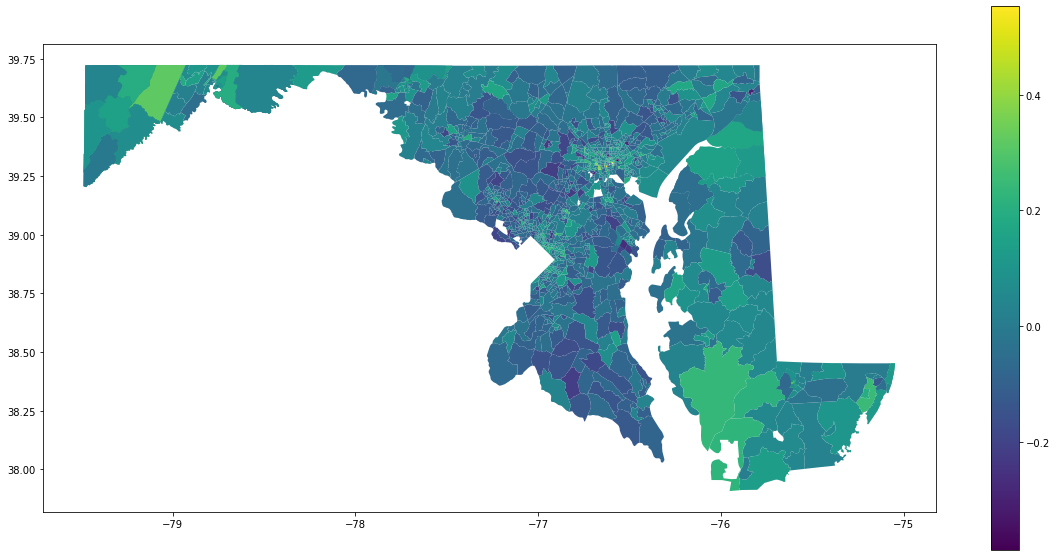

In [55]:
D_Shp_1['Sadness_2020_residual']=results_sad2020.resid
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Sadness_2020_residual', legend=True, ax=ax)

In [56]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Sadness_2020_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.30561260083415187 0.001


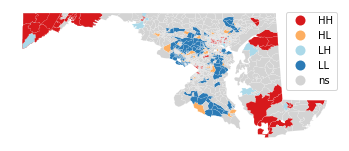

In [57]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Sadness_2020_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [58]:
from pysal.model import spreg


In [59]:
#reorganize data

y = D_Shp_1['Used_gas_2020'].values.reshape((-1,1))
X = D_Shp_1[cols_2020_input_gas].values

In [60]:
names_gas=[
 'to Work Public',
 'to Work WFH',
 'Median Household Income',
 'Educational Attainment',
 'No vehicle available',
 'In Poverty']


names_sad=[
 'Work Public',
 'Work WFH',
 'Educational Attainment' , 
 'No vehicle available',
 'In labor force',
 'In Poverty']


In [61]:
#calibrate OLS using PySAL

ols_results = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           7
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1485
R-squared           :      0.7716
Adjusted R-squared  :      0.7706
Sum squared residual:       2.853                F-statistic           :    835.9656
Sigma-square        :       0.002                Prob(F-statistic)     :           0
S.E. of regression  :       0.044                Log likelihood        :    2552.486
Sigma-square ML     :       0.002                Akaike info criterion :   -5090.972
S.E of regression ML:      0.0437                Schwarz criterion     :   -5053.817

-----------------------------------------------------------------------------

In [62]:
#calibrate lag model

lag_gas2020 = spreg.ML_Lag(y, X, w, name_x=names_gas)
print(lag_gas2020.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           8
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.7891
Spatial Pseudo R-squared:  0.7787
Sigma-square ML     :       0.002                Log likelihood        :    2605.365
S.E of regression   :       0.042                Akaike info criterion :   -5194.730
                                                 Schwarz criterion     :   -5152.267

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [63]:
#calibrate error model

error_gas2020 = spreg.ML_Error(y, X, w, name_x=names_gas)
print(error_gas2020.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           7
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.7710
Sigma-square ML     :       0.002                Log likelihood        :    2587.934
S.E of regression   :       0.042                Akaike info criterion :   -5161.868
                                                 Schwarz criterion     :   -5124.713

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

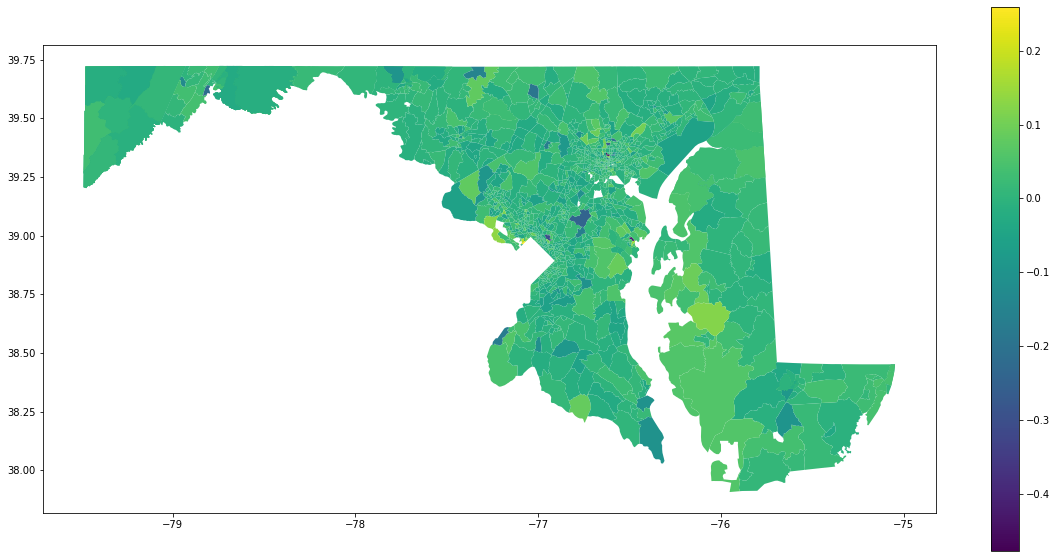

In [64]:
# extract residuals and plot them for counties
#lag 
D_Shp_1['lag_gas2020_u'] = lag_gas2020.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('lag_gas2020_u', legend=True, ax=ax)


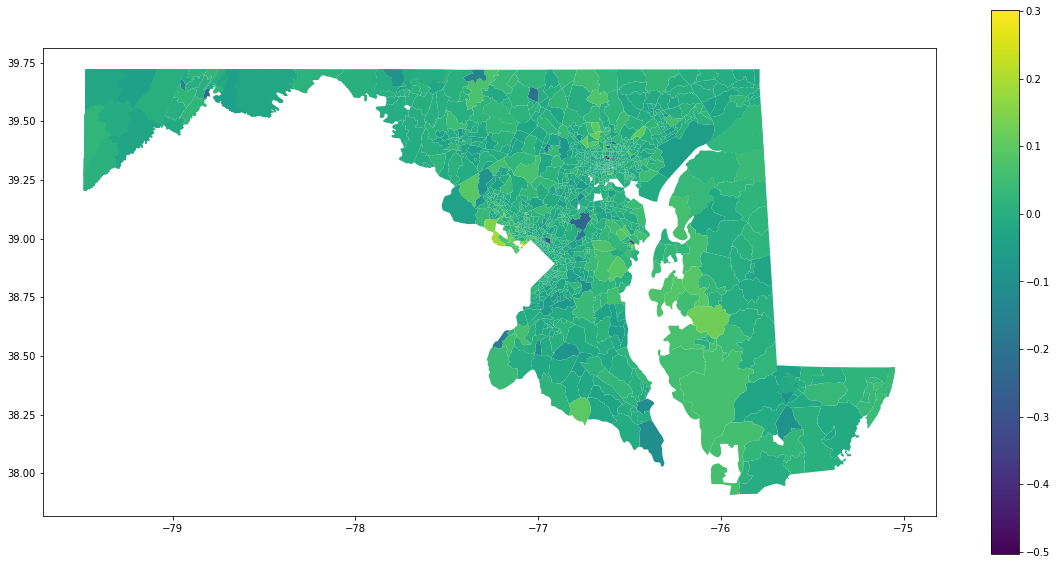

In [65]:
#error
D_Shp_1['error_gas2020_U'] = error_gas2020.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('error_gas2020_U', legend=True, ax=ax)

In [66]:
#Moran's I for the residuals from the lag model

#lag
lag_moran = Moran(D_Shp_1['lag_gas2020_u'] ,w)
print(lag_moran.I, lag_moran.p_sim)

0.015284123336394752 0.131


In [67]:
#error
Err_moran = Moran(D_Shp_1['error_gas2020_U'] ,w)
print(Err_moran.I, Err_moran.p_sim)

0.15803328901876917 0.001


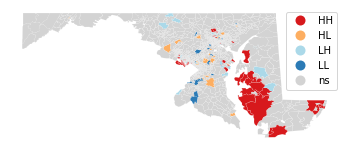

In [68]:
# hot and cold spots

#lag
local_m_lag= Moran_Local(D_Shp_1['lag_gas2020_u'], w)

lisa_cluster(local_m_lag, D_Shp_1);

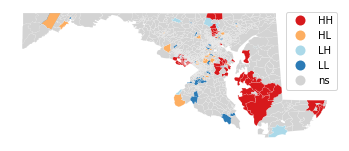

In [69]:
#error
local_m_err= Moran_Local(D_Shp_1['error_gas2020_U'], w)

lisa_cluster(local_m_err, D_Shp_1);

In [70]:
#reorganize data

y = D_Shp_1['Sadnesss_2020'].values.reshape((-1,1))
X = D_Shp_1[cols_2020_input_sad].values

In [71]:
#calibrate OLS using PySAL

ols_results_sad_2020 = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results_sad_2020.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3389                Number of Variables   :           8
S.D. dependent var  :      0.1846                Degrees of Freedom    :        1484
R-squared           :      0.6463
Adjusted R-squared  :      0.6446
Sum squared residual:      17.974                F-statistic           :    387.3598
Sigma-square        :       0.012                Prob(F-statistic)     :           0
S.E. of regression  :       0.110                Log likelihood        :    1179.469
Sigma-square ML     :       0.012                Akaike info criterion :   -2342.937
S.E of regression ML:      0.1098                Schwarz criterion     :   -2300.474

-----------------------------------------------------------------------------

In [72]:
#calibrate lag model

lag_sad2020 = spreg.ML_Lag(y, X, w, name_x=names_sad)
print(lag_sad2020.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3389                Number of Variables   :           9
S.D. dependent var  :      0.1846                Degrees of Freedom    :        1483
Pseudo R-squared    :      0.7909
Spatial Pseudo R-squared:  0.7422
Sigma-square ML     :       0.007                Log likelihood        :    1524.822
S.E of regression   :       0.084                Akaike info criterion :   -3031.644
                                                 Schwarz criterion     :   -2983.873

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [73]:
#calibrate error model

error_sad2020 = spreg.ML_Error(y, X, w, name_x=names_sad)
print(error_sad2020.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3389                Number of Variables   :           8
S.D. dependent var  :      0.1846                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.6368
Sigma-square ML     :       0.007                Log likelihood        :    1441.945
S.E of regression   :       0.086                Akaike info criterion :   -2867.890
                                                 Schwarz criterion     :   -2825.427

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [74]:
#####2019#####
##############
#############
###############################################################

In [75]:
cols_2019_input_gas = [ 
 '% Transportation to Work | Worked at home, 2019 [Estimated]',
 '% Transportation to Work |  Public transportation, 2019 [Estimated]',
 'Median Household Income, 2019',
 '# Educational Attainment | High school graduate (includes equivalency), 2019',
 '# Vehicles Available | No vehicle available, 2019',
 '% Poverty Status by Age | In Poverty, 2019 [Estimated]',

 ]


In [76]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2019_input_gas].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2019_input_gas].values, i)
                          for i in range(len(D_Shp_1[cols_2019_input_gas].columns))]
  
print(vif_data)

                                             feature       VIF
0  % Transportation to Work | Worked at home, 201...  3.320314
1  % Transportation to Work |  Public transportat...  2.676291
2                      Median Household Income, 2019  4.427177
3  # Educational Attainment | High school graduat...  2.969737
4  # Vehicles Available | No vehicle available, 2019  3.199693
5  % Poverty Status by Age | In Poverty, 2019 [Es...  3.099841


In [77]:
model_gas2019 = sm.OLS(D_Shp_1['Used_gas_2019'].to_numpy(),sm.add_constant( D_Shp_1[cols_2019_input_gas].to_numpy()))
results_gas2019 = model_gas2019.fit()
cols_2019_input_gas_name=['const', 
 '% Transportation to Work | Worked at home, 2019 [Estimated]',
 '% Transportation to Work |  Public transportation, 2019 [Estimated]',
 'Median Household Income, 2019',
 '# Educational Attainment | High school graduate (includes equivalency), 2019',
 '# Vehicles Available | No vehicle available, 2019',
 '% Poverty Status by Age | In Poverty, 2019 [Estimated]',
]

results_gas2019.summary(xname=cols_2019_input_gas_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     847.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:59:32   Log-Likelihood:                 2560.2
No. Observations:                1492   AIC:                            -5106.
Df Residuals:                    1485   BIC:                            -5069.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.2746      0.006     47.939      0.000       0.263       0.286
% Transportation to Work | Worked at home, 2019 [Estimated]                     -0.0039      0.015     -0.256      0.798      -0.033       0.026
% Transportation to Work |  Public transportation, 2019 [Estimated]              0.0232      0.011      2.177      0.030       0.002       0.044
Median Household Income, 2019                                                    0.4480      0.010     43.133      0.000       0.428       0.468
# Educational Attainment | High school graduate (includes equivalency), 2019    -0.0592      0.008     -7.305      0.000      -0.075      -0.043
# Vehicles Available | No vehicle available, 2019                                0.1006      0.016      6.206      0.000       0.069       0.132
% Poverty Status by Age | In Poverty, 2019 [Estimated]                          -0.0948      0.015     -6.519      0.000      -0.123      -0.066
==============================================================================
Omnibus:                      848.734   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32104.676
Skew:                          -2.017   Prob(JB):                         0.00
Kurtosis:                      25.364   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
D_Shp_1['Gas_2019_residual']=results_gas2019.resid

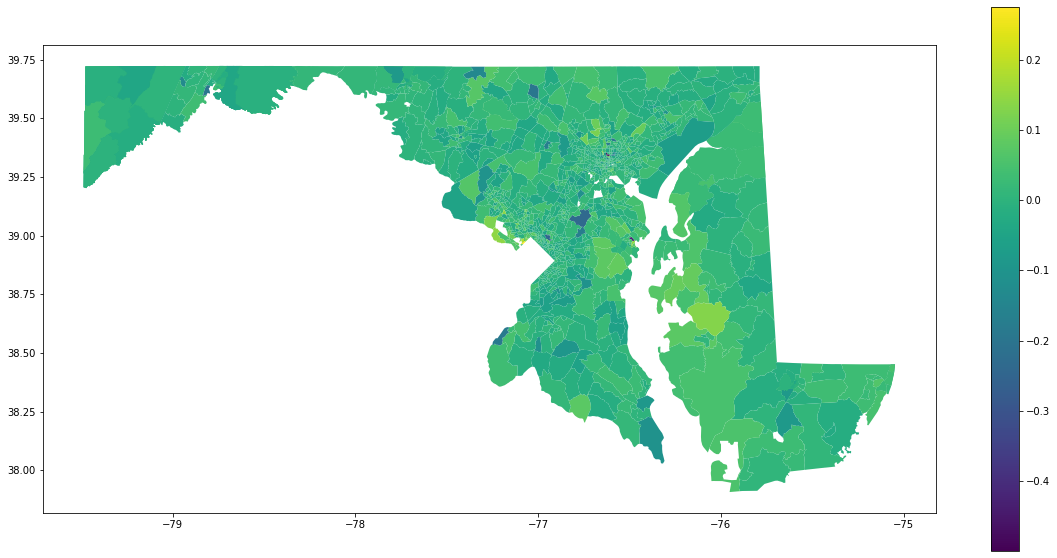

In [79]:
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Gas_2019_residual', legend=True, ax=ax)

In [80]:
w = sw.Queen.from_dataframe(D_Shp_1)


/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))


In [81]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Gas_2019_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.12654236155392837 0.001


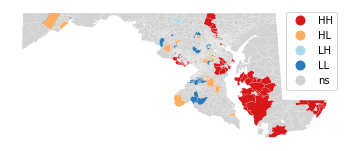

In [82]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Gas_2019_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [83]:
cols_2019_input_sad=[
 '% Transportation to Work |  Public transportation, 2019 [Estimated]',
 '% Transportation to Work | Worked at home, 2019 [Estimated]',
 'Population Density (per square mile), 2019',
 '# Educational Attainment | High school graduate (includes equivalency), 2019',
 '# Vehicles Available | No vehicle available, 2019',
 '% Employment Status | In labor force, 2019',
 '% Poverty Status by Age | In Poverty, 2019 [Estimated]',
 ]

In [84]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2019_input_sad].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2019_input_sad].values, i)
                          for i in range(len(D_Shp_1[cols_2019_input_sad].columns))]
  
print(vif_data)

                                             feature       VIF
0  % Transportation to Work |  Public transportat...  3.169669
1  % Transportation to Work | Worked at home, 201...  2.602651
2         Population Density (per square mile), 2019  3.273070
3  # Educational Attainment | High school graduat...  4.433431
4  # Vehicles Available | No vehicle available, 2019  3.390436
5         % Employment Status | In labor force, 2019  8.221266
6  % Poverty Status by Age | In Poverty, 2019 [Es...  3.129929


In [85]:
model_sad2019 = sm.OLS(D_Shp_1['Sadnesss_2019'].to_numpy(),sm.add_constant( D_Shp_1[cols_2019_input_sad].to_numpy()))
results_sad2019 = model_sad2019.fit()
testVIF_name=['const', 
 '% Transportation to Work |  Public transportation, 2019 [Estimated]',
 '% Transportation to Work | Worked at home, 2019 [Estimated]',
 'Population Density (per square mile), 2019 [Estimated]',
 '# Educational Attainment | High school graduate (includes equivalency), 2019',
 '# Vehicles Available | No vehicle available, 2019',
 '% Employment Status | In labor force, 2019',
 '% Poverty Status by Age | In Poverty, 2019 [Estimated]',
]

results_sad2019.summary(xname=testVIF_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     527.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:59:40   Log-Likelihood:                 1361.5
No. Observations:                1492   AIC:                            -2707.
Df Residuals:                    1484   BIC:                            -2664.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.4048      0.021     19.153      0.000       0.363       0.446
% Transportation to Work |  Public transportation, 2019 [Estimated]              0.0491      0.026      1.925      0.054      -0.001       0.099
% Transportation to Work | Worked at home, 2019 [Estimated]                     -0.3827      0.032    -12.051      0.000      -0.445      -0.320
Population Density (per square mile), 2019 [Estimated]                           0.1559      0.032      4.852      0.000       0.093       0.219
# Educational Attainment | High school graduate (includes equivalency), 2019     0.0486      0.018      2.705      0.007       0.013       0.084
# Vehicles Available | No vehicle available, 2019                                0.3793      0.037     10.157      0.000       0.306       0.453
% Employment Status | In labor force, 2019                                      -0.2594      0.025    -10.350      0.000      -0.309      -0.210
% Poverty Status by Age | In Poverty, 2019 [Estimated]                           0.8108      0.030     26.720      0.000       0.751       0.870
==============================================================================
Omnibus:                       62.363   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.692
Skew:                           0.385   Prob(JB):                     2.02e-20
Kurtosis:                       3.931   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

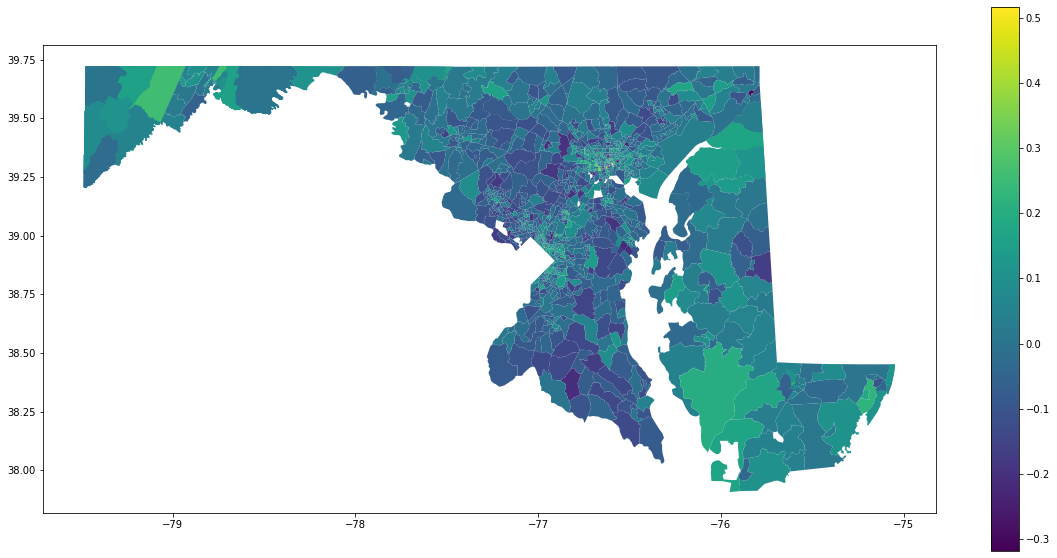

In [86]:
D_Shp_1['Sadness_2019_residual']=results_sad2019.resid
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Sadness_2019_residual', legend=True, ax=ax)

In [87]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Sadness_2019_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.28326067657235593 0.001


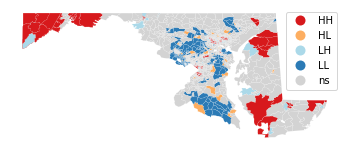

In [88]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Sadness_2019_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [89]:
#reorganize data

y = D_Shp_1['Used_gas_2019'].values.reshape((-1,1))
X = D_Shp_1[cols_2019_input_gas].values

In [90]:
names_gas=[
 'to Work Public',
 'to Work WFH',
 'Median Household Income',
 'Educational Attainment',
 'No vehicle available',
 'In Poverty']


names_sad=[
 'Work Public',
 'Work WFH',
 'Educational Attainment' , 
 'No vehicle available',
 'In labor force',
 'In Poverty']


In [91]:
#calibrate OLS using PySAL

ols_results = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           7
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1485
R-squared           :      0.7739
Adjusted R-squared  :      0.7730
Sum squared residual:       2.824                F-statistic           :    847.2043
Sigma-square        :       0.002                Prob(F-statistic)     :           0
S.E. of regression  :       0.044                Log likelihood        :    2560.184
Sigma-square ML     :       0.002                Akaike info criterion :   -5106.369
S.E of regression ML:      0.0435                Schwarz criterion     :   -5069.213

-----------------------------------------------------------------------------

In [92]:
#calibrate lag model

lag_gas2019 = spreg.ML_Lag(y, X, w, name_x=names_gas)
print(lag_gas2019.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           8
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.7911
Spatial Pseudo R-squared:  0.7818
Sigma-square ML     :       0.002                Log likelihood        :    2612.574
S.E of regression   :       0.042                Akaike info criterion :   -5209.148
                                                 Schwarz criterion     :   -5166.685

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [93]:
#calibrate error model

error_gas2019 = spreg.ML_Error(y, X, w, name_x=names_gas)
print(error_gas2019.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           7
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.7732
Sigma-square ML     :       0.002                Log likelihood        :    2591.111
S.E of regression   :       0.042                Akaike info criterion :   -5168.221
                                                 Schwarz criterion     :   -5131.066

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

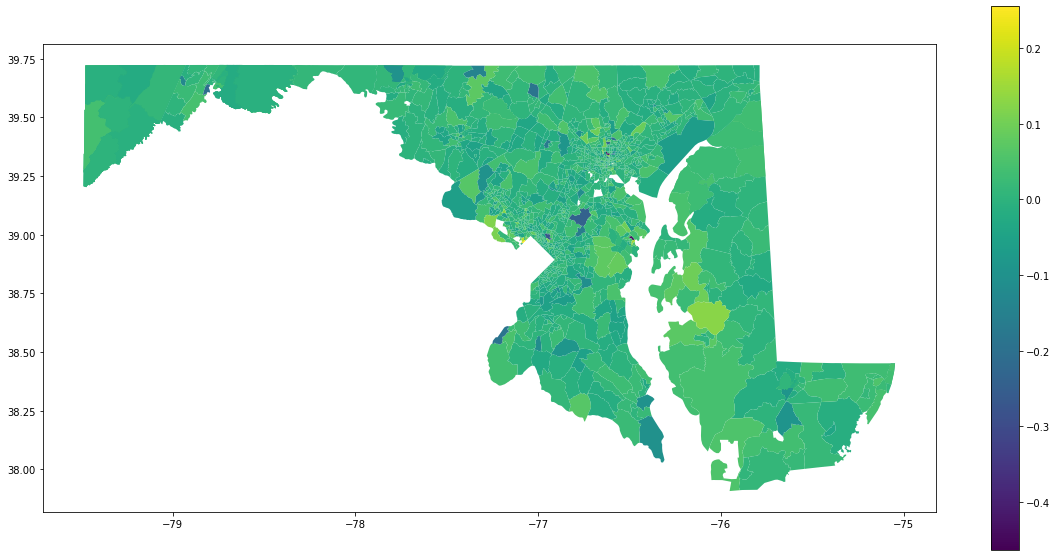

In [94]:
# extract residuals and plot them for counties
#lag 
D_Shp_1['lag_gas2019_u'] = lag_gas2019.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('lag_gas2019_u', legend=True, ax=ax)


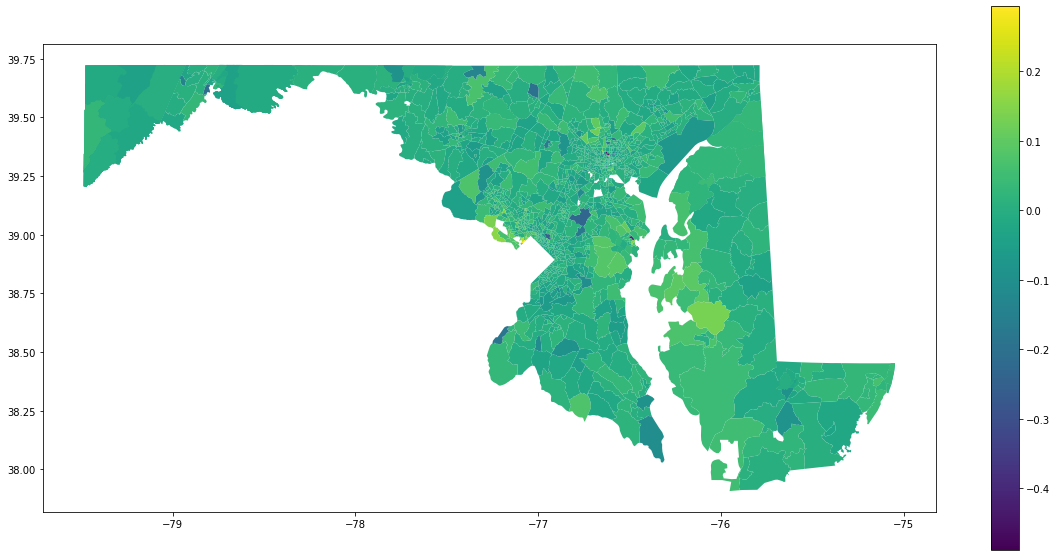

In [95]:
#error
D_Shp_1['error_gas2019_U'] = error_gas2019.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('error_gas2019_U', legend=True, ax=ax)

In [96]:
#Moran's I for the residuals from the lag model

#lag
lag_moran = Moran(D_Shp_1['lag_gas2019_u'] ,w)
print(lag_moran.I, lag_moran.p_sim)

0.009974050381912222 0.235


In [97]:
#error
Err_moran = Moran(D_Shp_1['error_gas2019_U'] ,w)
print(Err_moran.I, Err_moran.p_sim)

0.15011117837734592 0.001


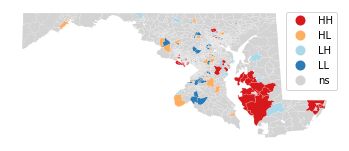

In [98]:
# hot and cold spots

#lag
local_m_lag= Moran_Local(D_Shp_1['lag_gas2019_u'], w)

lisa_cluster(local_m_lag, D_Shp_1);

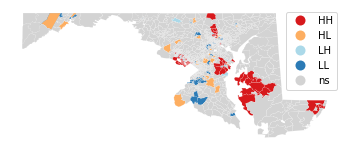

In [99]:
#error
local_m_err= Moran_Local(D_Shp_1['error_gas2019_U'], w)

lisa_cluster(local_m_err, D_Shp_1);

In [100]:
#reorganize data

y = D_Shp_1['Sadnesss_2019'].values.reshape((-1,1))
X = D_Shp_1[cols_2019_input_sad].values

In [101]:
#calibrate OLS using PySAL

ols_results_sad_2019 = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results_sad_2019.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3434                Number of Variables   :           8
S.D. dependent var  :      0.1815                Degrees of Freedom    :        1484
R-squared           :      0.7132
Adjusted R-squared  :      0.7118
Sum squared residual:      14.083                F-statistic           :    527.1153
Sigma-square        :       0.009                Prob(F-statistic)     :           0
S.E. of regression  :       0.097                Log likelihood        :    1361.477
Sigma-square ML     :       0.009                Akaike info criterion :   -2706.954
S.E of regression ML:      0.0972                Schwarz criterion     :   -2664.491

-----------------------------------------------------------------------------

In [102]:
#calibrate lag model

lag_sad2019 = spreg.ML_Lag(y, X, w, name_x=names_sad)
print(lag_sad2019.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3434                Number of Variables   :           9
S.D. dependent var  :      0.1815                Degrees of Freedom    :        1483
Pseudo R-squared    :      0.8185
Spatial Pseudo R-squared:  0.7805
Sigma-square ML     :       0.006                Log likelihood        :    1666.491
S.E of regression   :       0.077                Akaike info criterion :   -3314.982
                                                 Schwarz criterion     :   -3267.211

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [103]:
#calibrate error model

error_sad2019 = spreg.ML_Error(y, X, w, name_x=names_sad)
print(error_sad2019.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3434                Number of Variables   :           8
S.D. dependent var  :      0.1815                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.7050
Sigma-square ML     :       0.006                Log likelihood        :    1587.098
S.E of regression   :       0.079                Akaike info criterion :   -3158.196
                                                 Schwarz criterion     :   -3115.733

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [104]:
#####2018#########
####################
###################
##################

In [105]:
cols_2018_input_gas = [ 
 '% Transportation to Work | Worked at home, 2018',
 '% Transportation to Work |  Public transportation, 2018',
 'Median Household Income, 2018',
 '# Educational Attainment | High school graduate (includes equivalency), 2018',
 '# Vehicles Available | No vehicle available, 2018',
 '% Poverty Status by Age | In Poverty, 2018',

 ]


In [106]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2018_input_gas].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2018_input_gas].values, i)
                          for i in range(len(D_Shp_1[cols_2018_input_gas].columns))]
  
print(vif_data)

                                             feature       VIF
0    % Transportation to Work | Worked at home, 2018  3.920313
1  % Transportation to Work |  Public transportat...  2.925743
2                      Median Household Income, 2018  5.146285
3  # Educational Attainment | High school graduat...  3.041029
4  # Vehicles Available | No vehicle available, 2018  3.425987
5         % Poverty Status by Age | In Poverty, 2018  3.342227


In [107]:
model_gas2018 = sm.OLS(D_Shp_1['Used_gas_2018'].to_numpy(),sm.add_constant( D_Shp_1[cols_2018_input_gas].to_numpy()))
results_gas2018 = model_gas2018.fit()
cols_2018_input_gas_name=['const', 
 '% Transportation to Work | Worked at home, 2018',
 '% Transportation to Work |  Public transportation, 2018',
 'Median Household Income, 2018',
 '# Educational Attainment | High school graduate (includes equivalency), 2018',
 '# Vehicles Available | No vehicle available, 2018',
 '% Poverty Status by Age | In Poverty, 2018',
]

results_gas2018.summary(xname=cols_2018_input_gas_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     881.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:59:59   Log-Likelihood:                 2583.1
No. Observations:                1492   AIC:                            -5152.
Df Residuals:                    1485   BIC:                            -5115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.2787      0.006     47.399      0.000       0.267       0.290
% Transportation to Work | Worked at home, 2018                                 -0.0031      0.017     -0.175      0.861      -0.037       0.031
% Transportation to Work |  Public transportation, 2018                          0.0195      0.010      1.931      0.054      -0.000       0.039
Median Household Income, 2018                                                    0.4597      0.011     41.077      0.000       0.438       0.482
# Educational Attainment | High school graduate (includes equivalency), 2018    -0.0599      0.008     -7.637      0.000      -0.075      -0.044
# Vehicles Available | No vehicle available, 2018                                0.1036      0.015      6.732      0.000       0.073       0.134
% Poverty Status by Age | In Poverty, 2018                                      -0.1154      0.016     -7.387      0.000      -0.146      -0.085
==============================================================================
Omnibus:                      988.985   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54868.331
Skew:                          -2.416   Prob(JB):                         0.00
Kurtosis:                      32.313   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
D_Shp_1['Gas_2018_residual']=results_gas2018.resid

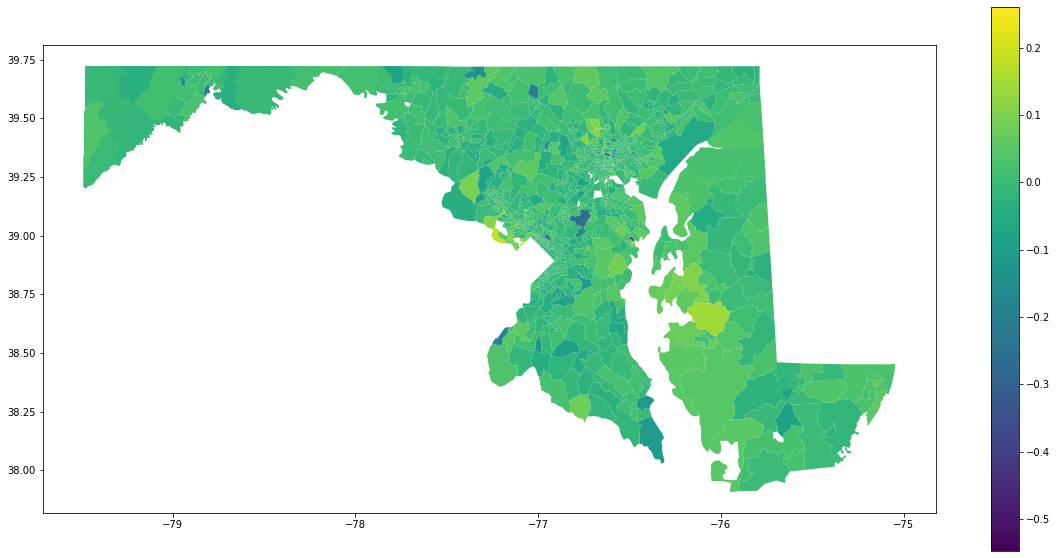

In [109]:
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Gas_2018_residual', legend=True, ax=ax)

In [110]:
w = sw.Queen.from_dataframe(D_Shp_1)


/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))


In [111]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Gas_2018_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.1352997383964072 0.001


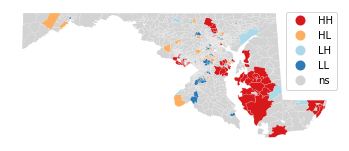

In [112]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Gas_2018_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [113]:
cols_2018_input_sad=[
 '% Transportation to Work |  Public transportation, 2018',
 '% Transportation to Work | Worked at home, 2018',
 '# Educational Attainment | High school graduate (includes equivalency), 2018',
 '# Vehicles Available | No vehicle available, 2018',
 '# Employment Status | In labor force, 2018',
 '% Poverty Status by Age | In Poverty, 2018',
 ]

In [114]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2018_input_sad].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2018_input_sad].values, i)
                          for i in range(len(D_Shp_1[cols_2018_input_sad].columns))]
  
print(vif_data)

                                             feature       VIF
0  % Transportation to Work |  Public transportat...  2.718244
1    % Transportation to Work | Worked at home, 2018  2.211910
2  # Educational Attainment | High school graduat...  5.685329
3  # Vehicles Available | No vehicle available, 2018  3.222603
4         # Employment Status | In labor force, 2018  6.358287
5         % Poverty Status by Age | In Poverty, 2018  3.462155


In [115]:
model_sad2018 = sm.OLS(D_Shp_1['Sadnesss_2018'].to_numpy(),sm.add_constant( D_Shp_1[cols_2018_input_sad].to_numpy()))
results_sad2018 = model_sad2018.fit()
testVIF_name=['const', 
 '% Transportation to Work |  Public transportation, 2018',
 '% Transportation to Work | Worked at home, 2018',
 '# Educational Attainment | High school graduate (includes equivalency), 2018',
 '# Vehicles Available | No vehicle available, 2018',
 '# Employment Status | In labor force, 2018',
 '% Poverty Status by Age | In Poverty, 2018',
]

results_sad2018.summary(xname=testVIF_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1004.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:00:08   Log-Likelihood:                 1680.8
No. Observations:                1492   AIC:                            -3348.
Df Residuals:                    1485   BIC:                            -3310.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.2432      0.008     31.603      0.000       0.228       0.258
% Transportation to Work |  Public transportation, 2018                          0.0472      0.018      2.562      0.011       0.011       0.083
% Transportation to Work | Worked at home, 2018                                 -0.2842      0.030     -9.581      0.000      -0.342      -0.226
# Educational Attainment | High school graduate (includes equivalency), 2018     0.1878      0.016     11.665      0.000       0.156       0.219
# Vehicles Available | No vehicle available, 2018                                0.3963      0.028     14.185      0.000       0.342       0.451
# Employment Status | In labor force, 2018                                      -0.3138      0.017    -18.554      0.000      -0.347      -0.281
% Poverty Status by Age | In Poverty, 2018                                       0.8950      0.026     34.772      0.000       0.844       0.945
==============================================================================
Omnibus:                       57.833   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.877
Skew:                           0.209   Prob(JB):                     3.80e-29
Kurtosis:                       4.389   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

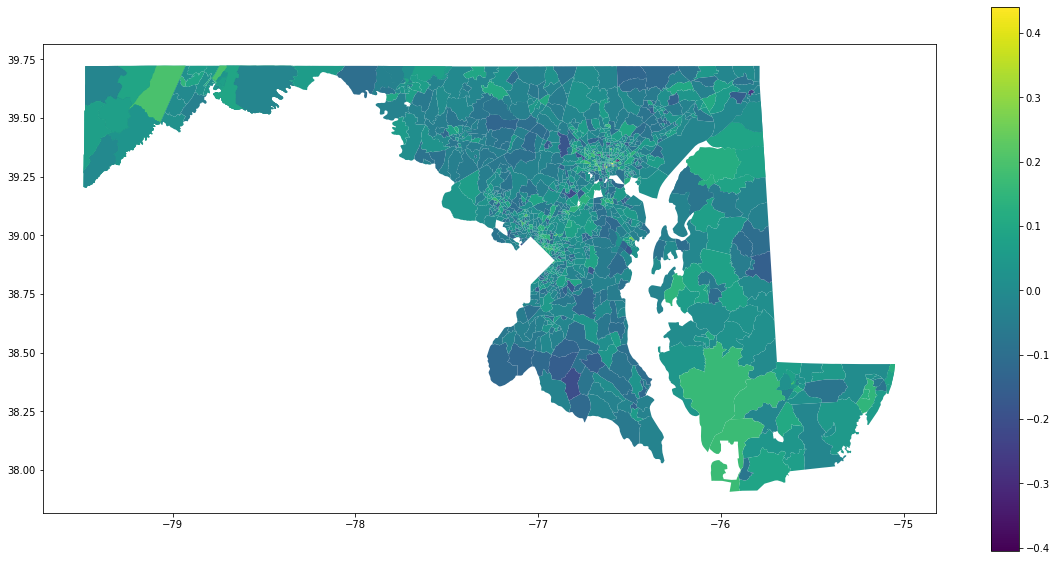

In [116]:
D_Shp_1['Sadness_2018_residual']=results_sad2018.resid
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Sadness_2018_residual', legend=True, ax=ax)

In [117]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Sadness_2018_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.1828252517031994 0.001


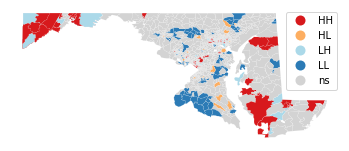

In [118]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Sadness_2018_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [119]:
#reorganize data

y = D_Shp_1['Used_gas_2018'].values.reshape((-1,1))
X = D_Shp_1[cols_2018_input_gas].values

In [120]:
names_gas=[
 'to Work Public',
 'to Work WFH',
 'Median Household Income',
 'Educational Attainment',
 'No vehicle available',
 'In Poverty']


names_sad=[
 'Work Public',
 'Work WFH',
 'Educational Attainment' , 
 'No vehicle available',
 'In labor force',
 'In Poverty']


In [121]:
#calibrate OLS using PySAL

ols_results = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           7
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1485
R-squared           :      0.7807
Adjusted R-squared  :      0.7799
Sum squared residual:       2.739                F-statistic           :    881.2950
Sigma-square        :       0.002                Prob(F-statistic)     :           0
S.E. of regression  :       0.043                Log likelihood        :    2583.061
Sigma-square ML     :       0.002                Akaike info criterion :   -5152.123
S.E of regression ML:      0.0428                Schwarz criterion     :   -5114.968

-----------------------------------------------------------------------------

In [122]:
#calibrate lag model

lag_gas2018 = spreg.ML_Lag(y, X, w, name_x=names_gas)
print(lag_gas2018.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           8
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.7962
Spatial Pseudo R-squared:  0.7862
Sigma-square ML     :       0.002                Log likelihood        :    2631.474
S.E of regression   :       0.041                Akaike info criterion :   -5246.947
                                                 Schwarz criterion     :   -5204.484

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [123]:
#calibrate error model

error_gas2018 = spreg.ML_Error(y, X, w, name_x=names_gas)
print(error_gas2018.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3985                Number of Variables   :           7
S.D. dependent var  :      0.0915                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.7795
Sigma-square ML     :       0.002                Log likelihood        :    2618.448
S.E of regression   :       0.041                Akaike info criterion :   -5222.895
                                                 Schwarz criterion     :   -5185.740

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

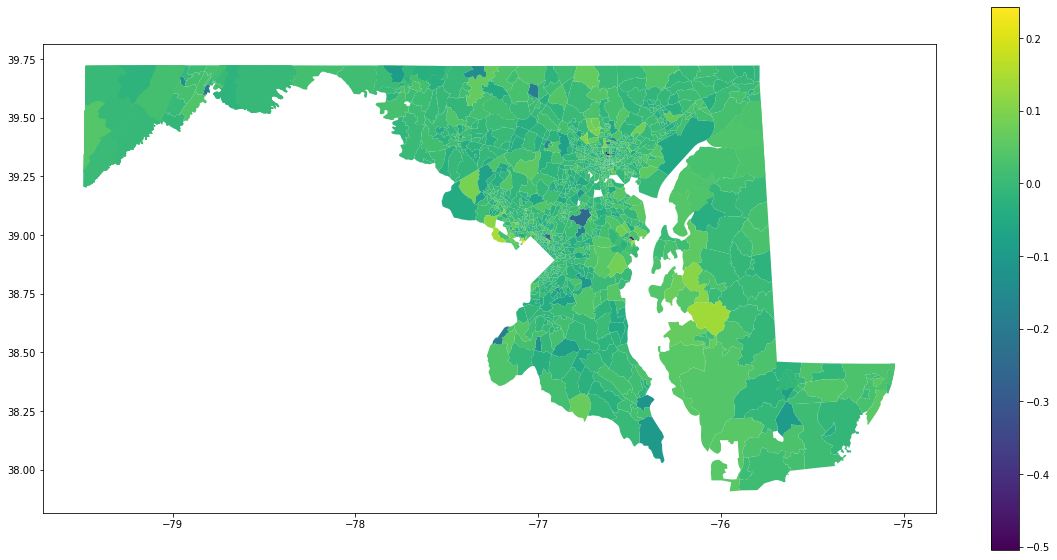

In [124]:
# extract residuals and plot them for counties
#lag 
D_Shp_1['lag_gas2018_u'] = lag_gas2018.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('lag_gas2018_u', legend=True, ax=ax)


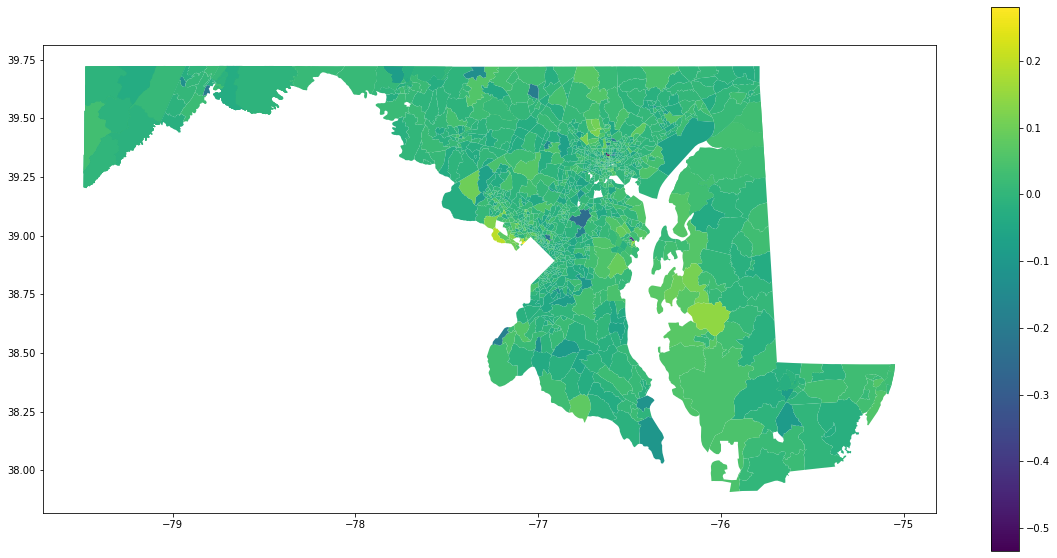

In [125]:
#error
D_Shp_1['error_gas2018_U'] = error_gas2018.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('error_gas2018_U', legend=True, ax=ax)

In [126]:
#Moran's I for the residuals from the lag model

#lag
lag_moran = Moran(D_Shp_1['lag_gas2018_u'] ,w)
print(lag_moran.I, lag_moran.p_sim)

0.023278217848302207 0.053


In [127]:
#error
Err_moran = Moran(D_Shp_1['error_gas2018_U'] ,w)
print(Err_moran.I, Err_moran.p_sim)

0.16277317185205623 0.001


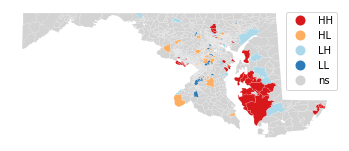

In [128]:
# hot and cold spots

#lag
local_m_lag= Moran_Local(D_Shp_1['lag_gas2018_u'], w)

lisa_cluster(local_m_lag, D_Shp_1);

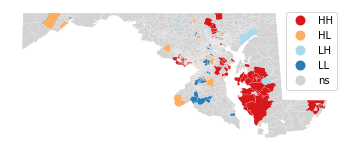

In [129]:
#error
local_m_err= Moran_Local(D_Shp_1['error_gas2018_U'], w)

lisa_cluster(local_m_err, D_Shp_1);

In [130]:
#reorganize data

y = D_Shp_1['Sadnesss_2018'].values.reshape((-1,1))
X = D_Shp_1[cols_2018_input_sad].values

In [131]:
#calibrate OLS using PySAL

ols_results_sad_2018 = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results_sad_2018.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3252                Number of Variables   :           7
S.D. dependent var  :      0.1764                Degrees of Freedom    :        1485
R-squared           :      0.8022
Adjusted R-squared  :      0.8014
Sum squared residual:       9.179                F-statistic           :   1003.9712
Sigma-square        :       0.006                Prob(F-statistic)     :           0
S.E. of regression  :       0.079                Log likelihood        :    1680.801
Sigma-square ML     :       0.006                Akaike info criterion :   -3347.602
S.E of regression ML:      0.0784                Schwarz criterion     :   -3310.447

-----------------------------------------------------------------------------

In [132]:
#calibrate lag model

lag_sad2018 = spreg.ML_Lag(y, X, w, name_x=names_sad)
print(lag_sad2018.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3252                Number of Variables   :           8
S.D. dependent var  :      0.1764                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.8448
Spatial Pseudo R-squared:  0.8294
Sigma-square ML     :       0.005                Log likelihood        :    1844.695
S.E of regression   :       0.069                Akaike info criterion :   -3673.390
                                                 Schwarz criterion     :   -3630.927

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [133]:
#calibrate error model

error_sad2018 = spreg.ML_Error(y, X, w, name_x=names_sad)
print(error_sad2018.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3252                Number of Variables   :           7
S.D. dependent var  :      0.1764                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.8010
Sigma-square ML     :       0.005                Log likelihood        :    1768.555
S.E of regression   :       0.072                Akaike info criterion :   -3523.110
                                                 Schwarz criterion     :   -3485.955

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [134]:
#####2017#####
##############
################################################

In [135]:
cols_2017_input_gas = [ 
 '% Transportation to Work | Worked at home, 2017',
 '% Transportation to Work |  Public transportation, 2017',
 'Median Household Income, 2017',
 '# Educational Attainment | High school graduate (includes equivalency), 2017',
 '# Vehicles Available | No vehicle available, 2017',
 '% Poverty Status by Age | In Poverty, 2017',

 ]


In [136]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2017_input_gas].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2017_input_gas].values, i)
                          for i in range(len(D_Shp_1[cols_2017_input_gas].columns))]
  
print(vif_data)

                                             feature       VIF
0    % Transportation to Work | Worked at home, 2017  3.698483
1  % Transportation to Work |  Public transportat...  2.855828
2                      Median Household Income, 2017  4.963443
3  # Educational Attainment | High school graduat...  3.075490
4  # Vehicles Available | No vehicle available, 2017  3.581328
5         % Poverty Status by Age | In Poverty, 2017  3.421208


In [137]:
model_gas2017 = sm.OLS(D_Shp_1['Used_gas_2017'].to_numpy(),sm.add_constant( D_Shp_1[cols_2017_input_gas].to_numpy()))
results_gas2017 = model_gas2017.fit()
cols_2017_input_gas_name=['const', 
 '% Transportation to Work | Worked at home, 2017',
 '% Transportation to Work |  Public transportation, 2017',
 'Median Household Income, 2017',
 '# Educational Attainment | High school graduate (includes equivalency), 2017',
 '# Vehicles Available | No vehicle available, 2017',
 '% Poverty Status by Age | In Poverty, 2017',
]

results_gas2017.summary(xname=cols_2017_input_gas_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     944.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:00:28   Log-Likelihood:                 2603.5
No. Observations:                1492   AIC:                            -5193.
Df Residuals:                    1485   BIC:                            -5156.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.2842      0.006     48.376      0.000       0.273       0.296
% Transportation to Work | Worked at home, 2017                                 -0.0156      0.018     -0.856      0.392      -0.051       0.020
% Transportation to Work |  Public transportation, 2017                          0.0210      0.009      2.251      0.025       0.003       0.039
Median Household Income, 2017                                                    0.4894      0.011     43.032      0.000       0.467       0.512
# Educational Attainment | High school graduate (includes equivalency), 2017    -0.0482      0.007     -6.993      0.000      -0.062      -0.035
# Vehicles Available | No vehicle available, 2017                                0.1091      0.014      7.666      0.000       0.081       0.137
% Poverty Status by Age | In Poverty, 2017                                      -0.1296      0.015     -8.494      0.000      -0.160      -0.100
==============================================================================
Omnibus:                     1014.067   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54963.303
Skew:                          -2.522   Prob(JB):                         0.00
Kurtosis:                      32.303   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
D_Shp_1['Gas_2017_residual']=results_gas2017.resid

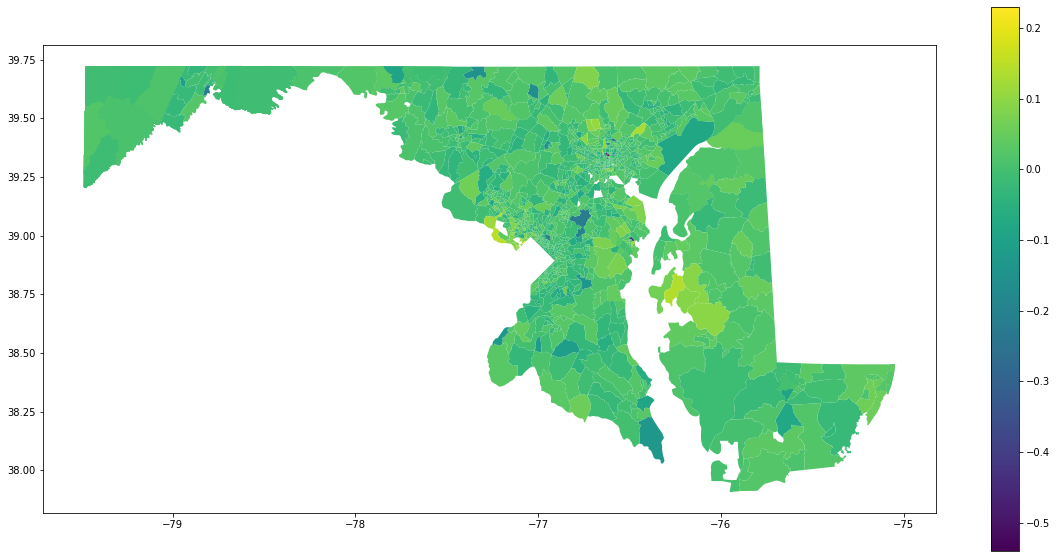

In [139]:
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Gas_2017_residual', legend=True, ax=ax)

In [140]:
w = sw.Queen.from_dataframe(D_Shp_1)


/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))


In [141]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Gas_2017_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.13733873456660786 0.001


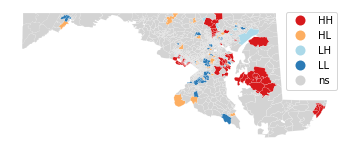

In [142]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Gas_2017_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [143]:
cols_2017_input_sad=[
 '% Transportation to Work |  Public transportation, 2017',
 '% Transportation to Work | Worked at home, 2017',
 '# Educational Attainment | High school graduate (includes equivalency), 2017',
 '# Vehicles Available | No vehicle available, 2017',
 '% Employment Status | In labor force, 2017',
 '% Poverty Status by Age | In Poverty, 2017',
 ]

In [144]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2017_input_sad].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2017_input_sad].values, i)
                          for i in range(len(D_Shp_1[cols_2017_input_sad].columns))]
  
print(vif_data)

                                             feature       VIF
0  % Transportation to Work |  Public transportat...  3.052942
1    % Transportation to Work | Worked at home, 2017  2.701968
2  # Educational Attainment | High school graduat...  4.263047
3  # Vehicles Available | No vehicle available, 2017  3.518269
4         % Employment Status | In labor force, 2017  7.826083
5         % Poverty Status by Age | In Poverty, 2017  3.406053


In [145]:
model_sad2017 = sm.OLS(D_Shp_1['Sadnesss_2017'].to_numpy(),sm.add_constant( D_Shp_1[cols_2017_input_sad].to_numpy()))
results_sad2017 = model_sad2017.fit()
testVIF_name=['const', 
 '% Transportation to Work |  Public transportation, 2017',
 '% Transportation to Work | Worked at home, 2017',
 '# Educational Attainment | High school graduate (includes equivalency), 2017',
 '# Vehicles Available | No vehicle available, 2017',
 '% Employment Status | In labor force, 2017',
 '% Poverty Status by Age | In Poverty, 2017',
]

results_sad2017.summary(xname=testVIF_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     826.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:00:36   Log-Likelihood:                 1548.3
No. Observations:                1492   AIC:                            -3083.
Df Residuals:                    1485   BIC:                            -3045.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.3208      0.019     16.677      0.000       0.283       0.359
% Transportation to Work |  Public transportation, 2017                          0.0650      0.019      3.387      0.001       0.027       0.103
% Transportation to Work | Worked at home, 2017                                 -0.3864      0.035    -10.995      0.000      -0.455      -0.317
# Educational Attainment | High school graduate (includes equivalency), 2017     0.0314      0.014      2.306      0.021       0.005       0.058
# Vehicles Available | No vehicle available, 2017                                0.2900      0.029     10.130      0.000       0.234       0.346
% Employment Status | In labor force, 2017                                      -0.1706      0.021     -7.950      0.000      -0.213      -0.128
% Poverty Status by Age | In Poverty, 2017                                       0.9856      0.028     35.317      0.000       0.931       1.040
==============================================================================
Omnibus:                       58.784   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.858
Skew:                           0.341   Prob(JB):                     6.86e-21
Kurtosis:                       4.014   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

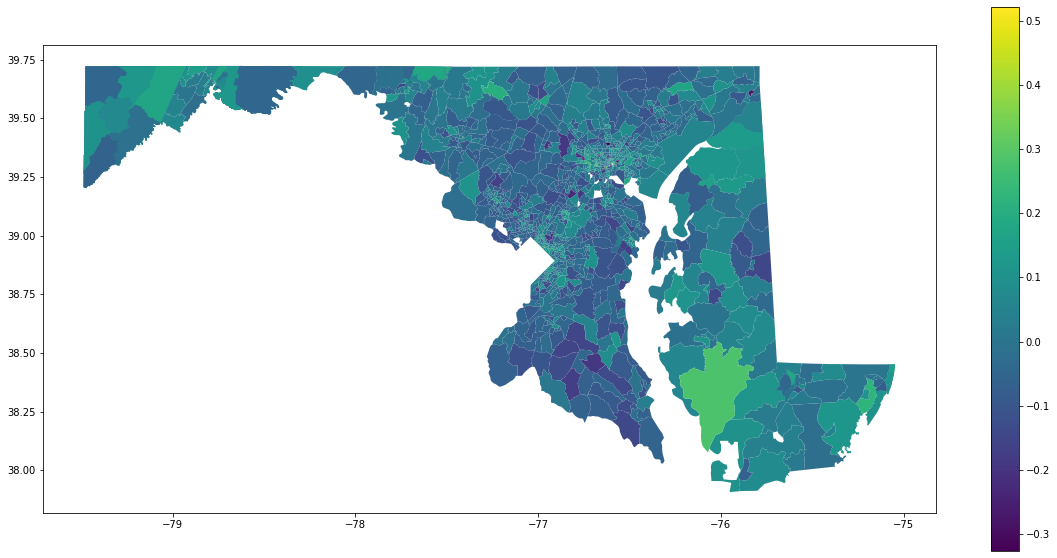

In [146]:
D_Shp_1['Sadness_2017_residual']=results_sad2017.resid
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Sadness_2017_residual', legend=True, ax=ax)

In [147]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Sadness_2017_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.24568059991252422 0.001


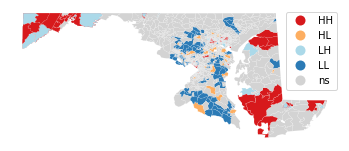

In [148]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Sadness_2017_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [149]:
#reorganize data

y = D_Shp_1['Used_gas_2017'].values.reshape((-1,1))
X = D_Shp_1[cols_2017_input_gas].values

In [150]:
names_gas=[
 'to Work Public',
 'to Work WFH',
 'Median Household Income',
 'Educational Attainment',
 'No vehicle available',
 'In Poverty']


names_sad=[
 'Work Public',
 'Work WFH',
 'Educational Attainment' , 
 'No vehicle available',
 'In labor force',
 'In Poverty']


In [151]:
#calibrate OLS using PySAL

ols_results = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.4074                Number of Variables   :           7
S.D. dependent var  :      0.0928                Degrees of Freedom    :        1485
R-squared           :      0.7924
Adjusted R-squared  :      0.7915
Sum squared residual:       2.665                F-statistic           :    944.4973
Sigma-square        :       0.002                Prob(F-statistic)     :           0
S.E. of regression  :       0.042                Log likelihood        :    2603.513
Sigma-square ML     :       0.002                Akaike info criterion :   -5193.027
S.E of regression ML:      0.0423                Schwarz criterion     :   -5155.872

-----------------------------------------------------------------------------

In [152]:
#calibrate lag model

lag_gas2017 = spreg.ML_Lag(y, X, w, name_x=names_gas)
print(lag_gas2017.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.4074                Number of Variables   :           8
S.D. dependent var  :      0.0928                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.8091
Spatial Pseudo R-squared:  0.7995
Sigma-square ML     :       0.002                Log likelihood        :    2659.568
S.E of regression   :       0.041                Akaike info criterion :   -5303.136
                                                 Schwarz criterion     :   -5260.673

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [153]:
#calibrate error model

error_gas2017 = spreg.ML_Error(y, X, w, name_x=names_gas)
print(error_gas2017.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.4074                Number of Variables   :           7
S.D. dependent var  :      0.0928                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.7912
Sigma-square ML     :       0.002                Log likelihood        :    2640.686
S.E of regression   :       0.041                Akaike info criterion :   -5267.371
                                                 Schwarz criterion     :   -5230.216

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

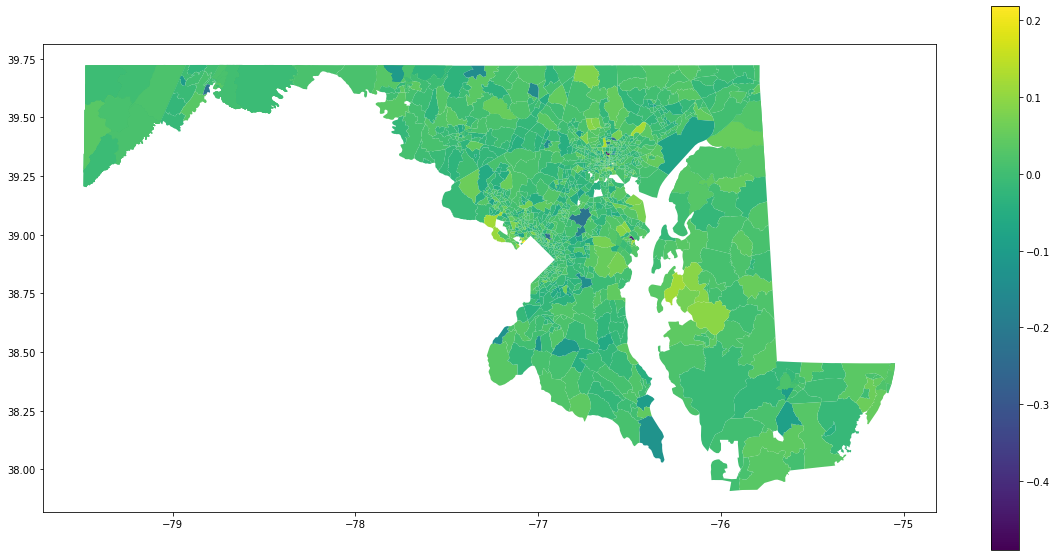

In [154]:
# extract residuals and plot them for counties
#lag 
D_Shp_1['lag_gas2017_u'] = lag_gas2017.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('lag_gas2017_u', legend=True, ax=ax)


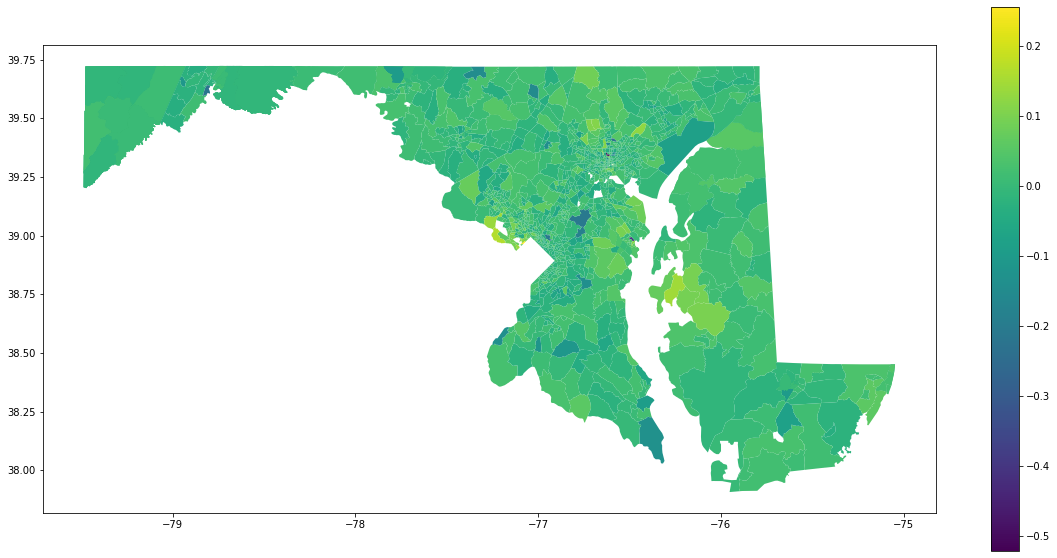

In [155]:
#error
D_Shp_1['error_gas2017_U'] = error_gas2017.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('error_gas2017_U', legend=True, ax=ax)

In [156]:
#Moran's I for the residuals from the lag model

#lag
lag_moran = Moran(D_Shp_1['lag_gas2017_u'] ,w)
print(lag_moran.I, lag_moran.p_sim)

0.01687914120904434 0.106


In [157]:
#error
Err_moran = Moran(D_Shp_1['error_gas2017_U'] ,w)
print(Err_moran.I, Err_moran.p_sim)

0.16976632846693326 0.001


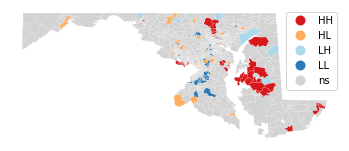

In [158]:
# hot and cold spots

#lag
local_m_lag= Moran_Local(D_Shp_1['lag_gas2017_u'], w)

lisa_cluster(local_m_lag, D_Shp_1);

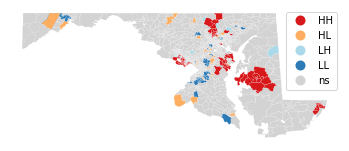

In [159]:
#error
local_m_err= Moran_Local(D_Shp_1['error_gas2017_U'], w)

lisa_cluster(local_m_err, D_Shp_1);

In [160]:
#reorganize data

y = D_Shp_1['Sadnesss_2017'].values.reshape((-1,1))
X = D_Shp_1[cols_2017_input_sad].values

In [161]:
#calibrate OLS using PySAL

ols_results_sad_2017 = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results_sad_2017.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3348                Number of Variables   :           7
S.D. dependent var  :      0.1786                Degrees of Freedom    :        1485
R-squared           :      0.7696
Adjusted R-squared  :      0.7686
Sum squared residual:      10.963                F-statistic           :    826.5156
Sigma-square        :       0.007                Prob(F-statistic)     :           0
S.E. of regression  :       0.086                Log likelihood        :    1548.312
Sigma-square ML     :       0.007                Akaike info criterion :   -3082.624
S.E of regression ML:      0.0857                Schwarz criterion     :   -3045.469

-----------------------------------------------------------------------------

In [162]:
#calibrate lag model

lag_sad2017 = spreg.ML_Lag(y, X, w, name_x=names_sad)
print(lag_sad2017.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3348                Number of Variables   :           8
S.D. dependent var  :      0.1786                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.8361
Spatial Pseudo R-squared:  0.8095
Sigma-square ML     :       0.005                Log likelihood        :    1778.350
S.E of regression   :       0.072                Akaike info criterion :   -3540.699
                                                 Schwarz criterion     :   -3498.236

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [163]:
#calibrate error model

error_sad2017 = spreg.ML_Error(y, X, w, name_x=names_sad)
print(error_sad2017.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3348                Number of Variables   :           7
S.D. dependent var  :      0.1786                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.7635
Sigma-square ML     :       0.005                Log likelihood        :    1709.036
S.E of regression   :       0.073                Akaike info criterion :   -3404.071
                                                 Schwarz criterion     :   -3366.916

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [164]:
#####2016#####
##############

In [165]:
cols_2016_input_gas = [ 
 '% Transportation to Work | Worked at home, 2016',
 '% Transportation to Work |  Public transportation, 2016',
 'Median Household Income, 2016',
 '# Educational Attainment | High school graduate (includes equivalency), 2016',
 '# Vehicles Available | No vehicle available, 2016',
 '% Poverty Status by Age | In Poverty, 2016',

 ]


In [166]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2016_input_gas].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2016_input_gas].values, i)
                          for i in range(len(D_Shp_1[cols_2016_input_gas].columns))]
  
print(vif_data)

                                             feature       VIF
0    % Transportation to Work | Worked at home, 2016  3.475827
1  % Transportation to Work |  Public transportat...  2.913737
2                      Median Household Income, 2016  4.735626
3  # Educational Attainment | High school graduat...  3.157680
4  # Vehicles Available | No vehicle available, 2016  3.640484
5         % Poverty Status by Age | In Poverty, 2016  3.517543


In [167]:
model_gas2016 = sm.OLS(D_Shp_1['Used_gas_2016'].to_numpy(),sm.add_constant( D_Shp_1[cols_2016_input_gas].to_numpy()))
results_gas2016 = model_gas2016.fit()
cols_2016_input_gas_name=['const', 
 '% Transportation to Work | Worked at home, 2016',
 '% Transportation to Work |  Public transportation, 2016',
 'Median Household Income, 2016',
 '# Educational Attainment | High school graduate (includes equivalency), 2016',
 '# Vehicles Available | No vehicle available, 2016',
 '% Poverty Status by Age | In Poverty, 2016',
]

results_gas2016.summary(xname=cols_2016_input_gas_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     976.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:00:56   Log-Likelihood:                 2674.3
No. Observations:                1492   AIC:                            -5335.
Df Residuals:                    1485   BIC:                            -5297.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.2683      0.006     47.374      0.000       0.257       0.279
% Transportation to Work | Worked at home, 2016                                  0.0008      0.015      0.052      0.959      -0.028       0.030
% Transportation to Work |  Public transportation, 2016                          0.0153      0.008      1.906      0.057      -0.000       0.031
Median Household Income, 2016                                                    0.4889      0.011     43.821      0.000       0.467       0.511
# Educational Attainment | High school graduate (includes equivalency), 2016    -0.0443      0.007     -6.592      0.000      -0.057      -0.031
# Vehicles Available | No vehicle available, 2016                                0.1015      0.014      7.359      0.000       0.074       0.129
% Poverty Status by Age | In Poverty, 2016                                      -0.1110      0.013     -8.231      0.000      -0.137      -0.085
==============================================================================
Omnibus:                      976.005   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63061.073
Skew:                          -2.317   Prob(JB):                         0.00
Kurtosis:                      34.511   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
D_Shp_1['Gas_2016_residual']=results_gas2016.resid

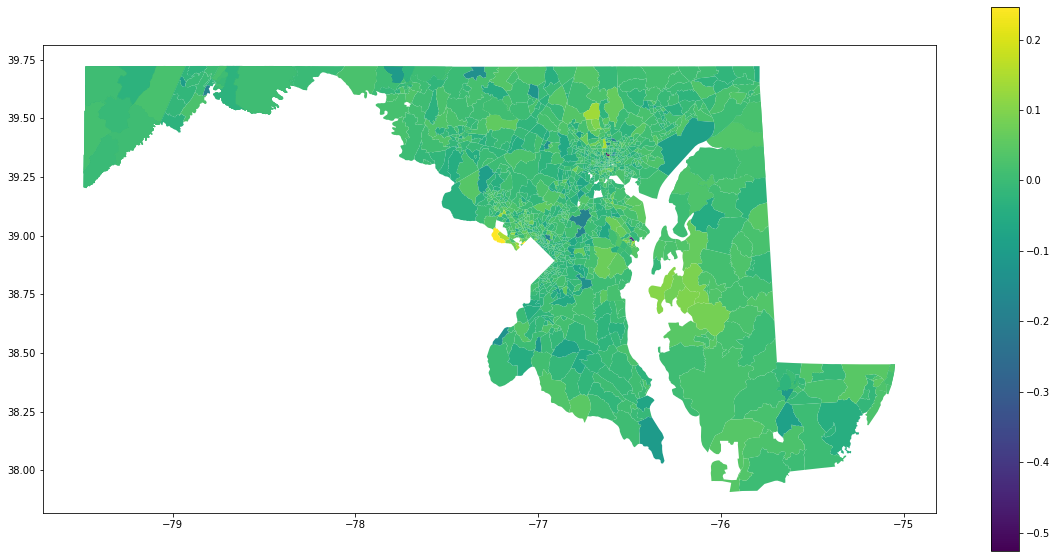

In [169]:
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Gas_2016_residual', legend=True, ax=ax)

In [170]:
w = sw.Queen.from_dataframe(D_Shp_1)


/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))


In [171]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Gas_2016_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.11789012894444256 0.001


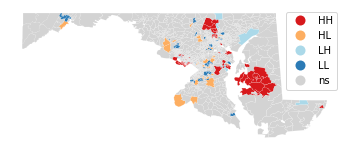

In [172]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Gas_2016_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [173]:
cols_2016_input_sad=[
 '% Transportation to Work |  Public transportation, 2016',
 '% Transportation to Work | Worked at home, 2016',
 '# Educational Attainment | High school graduate (includes equivalency), 2016',
 '# Vehicles Available | No vehicle available, 2016',
 '% Employment Status | In labor force, 2016',
 '% Poverty Status by Age | In Poverty, 2016',
 ]

In [174]:
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = D_Shp_1[cols_2016_input_sad].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(D_Shp_1[cols_2016_input_sad].values, i)
                          for i in range(len(D_Shp_1[cols_2016_input_sad].columns))]
  
print(vif_data)

                                             feature       VIF
0  % Transportation to Work |  Public transportat...  3.137602
1    % Transportation to Work | Worked at home, 2016  2.592157
2  # Educational Attainment | High school graduat...  4.418373
3  # Vehicles Available | No vehicle available, 2016  3.589040
4         % Employment Status | In labor force, 2016  7.734239
5         % Poverty Status by Age | In Poverty, 2016  3.414812


In [175]:
model_sad2016 = sm.OLS(D_Shp_1['Sadnesss_2016'].to_numpy(),sm.add_constant( D_Shp_1[cols_2016_input_sad].to_numpy()))
results_sad2016 = model_sad2016.fit()
testVIF_name=['const', 
 '% Transportation to Work |  Public transportation, 2016',
 '% Transportation to Work | Worked at home, 2016',
 '# Educational Attainment | High school graduate (includes equivalency), 2016',
 '# Vehicles Available | No vehicle available, 2016',
 '# Employment Status | In labor force, 2016',
 '% Poverty Status by Age | In Poverty, 2016',
]

results_sad2016.summary(xname=testVIF_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.80e-190
Time:                        17:01:04   Log-Likelihood:                 908.26
No. Observations:                1492   AIC:                            -1803.
Df Residuals:                    1485   BIC:                            -1765.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            0.4485      0.029     15.449      0.000       0.392       0.505
% Transportation to Work |  Public transportation, 2016                          0.6306      0.027     23.649      0.000       0.578       0.683
% Transportation to Work | Worked at home, 2016                                 -0.4127      0.047     -8.777      0.000      -0.505      -0.320
# Educational Attainment | High school graduate (includes equivalency), 2016     0.1761      0.021      8.252      0.000       0.134       0.218
# Vehicles Available | No vehicle available, 2016                               -0.2768      0.045     -6.185      0.000      -0.365      -0.189
# Employment Status | In labor force, 2016                                      -0.0321      0.033     -0.972      0.331      -0.097       0.033
% Poverty Status by Age | In Poverty, 2016                                       0.2682      0.039      6.845      0.000       0.191       0.345
==============================================================================
Omnibus:                       70.116   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.064
Skew:                          -0.160   Prob(JB):                     2.96e-45
Kurtosis:                       4.788   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

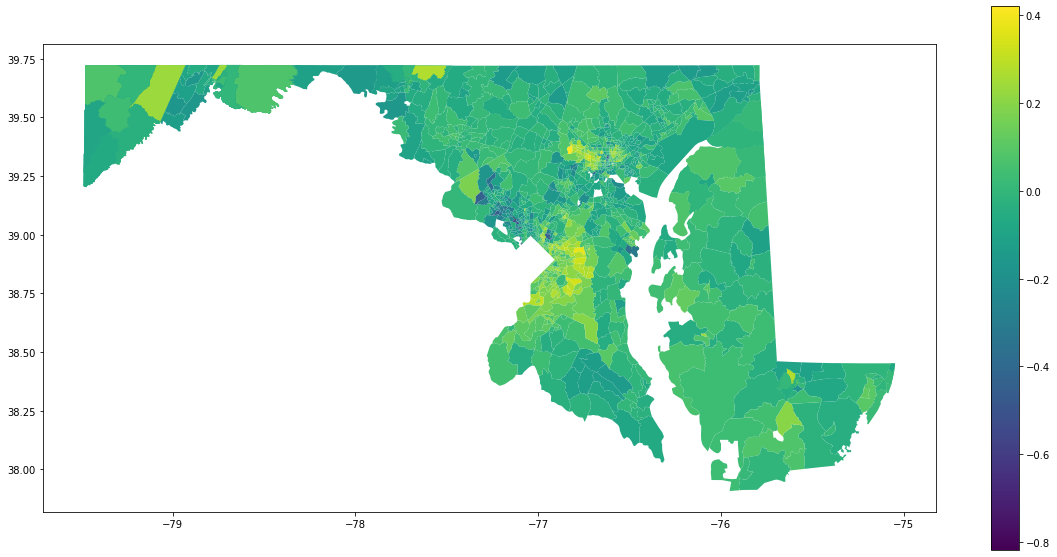

In [176]:
D_Shp_1['Sadness_2016_residual']=results_sad2016.resid
# plot the residuals

fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('Sadness_2016_residual', legend=True, ax=ax)

In [177]:
# compute Moran's I on the residuals
res_moran = Moran(D_Shp_1['Sadness_2016_residual'],w)
print(res_moran.I, res_moran.p_sim)

0.5579986144461475 0.001


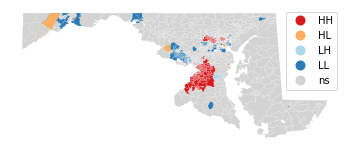

In [178]:
# compute local Moran's I on the residuals and plot hot spots and cold spots
local_m_res= Moran_Local(D_Shp_1['Sadness_2016_residual'], w)

lisa_cluster(local_m_res, D_Shp_1);

In [179]:
#reorganize data

y = D_Shp_1['Used_gas_2016'].values.reshape((-1,1))
X = D_Shp_1[cols_2016_input_gas].values

In [180]:
names_gas=[
 'to Work Public',
 'to Work WFH',
 'Median Household Income',
 'Educational Attainment',
 'No vehicle available',
 'In Poverty']


names_sad=[
 'Work Public',
 'Work WFH',
 'Educational Attainment' , 
 'No vehicle available',
 'In labor force',
 'In Poverty']


In [181]:
#calibrate OLS using PySAL

ols_results = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3872                Number of Variables   :           7
S.D. dependent var  :      0.0897                Degrees of Freedom    :        1485
R-squared           :      0.7979
Adjusted R-squared  :      0.7970
Sum squared residual:       2.423                F-statistic           :    976.9254
Sigma-square        :       0.002                Prob(F-statistic)     :           0
S.E. of regression  :       0.040                Log likelihood        :    2674.324
Sigma-square ML     :       0.002                Akaike info criterion :   -5334.648
S.E of regression ML:      0.0403                Schwarz criterion     :   -5297.493

-----------------------------------------------------------------------------

In [182]:
#calibrate lag model

lag_gas2016 = spreg.ML_Lag(y, X, w, name_x=names_gas)
print(lag_gas2016.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3872                Number of Variables   :           8
S.D. dependent var  :      0.0897                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.8141
Spatial Pseudo R-squared:  0.8064
Sigma-square ML     :       0.001                Log likelihood        :    2730.217
S.E of regression   :       0.039                Akaike info criterion :   -5444.433
                                                 Schwarz criterion     :   -5401.970

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [183]:
#calibrate error model

error_gas2016 = spreg.ML_Error(y, X, w, name_x=names_gas)
print(error_gas2016.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.3872                Number of Variables   :           7
S.D. dependent var  :      0.0897                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.7969
Sigma-square ML     :       0.002                Log likelihood        :    2703.118
S.E of regression   :       0.039                Akaike info criterion :   -5392.235
                                                 Schwarz criterion     :   -5355.080

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

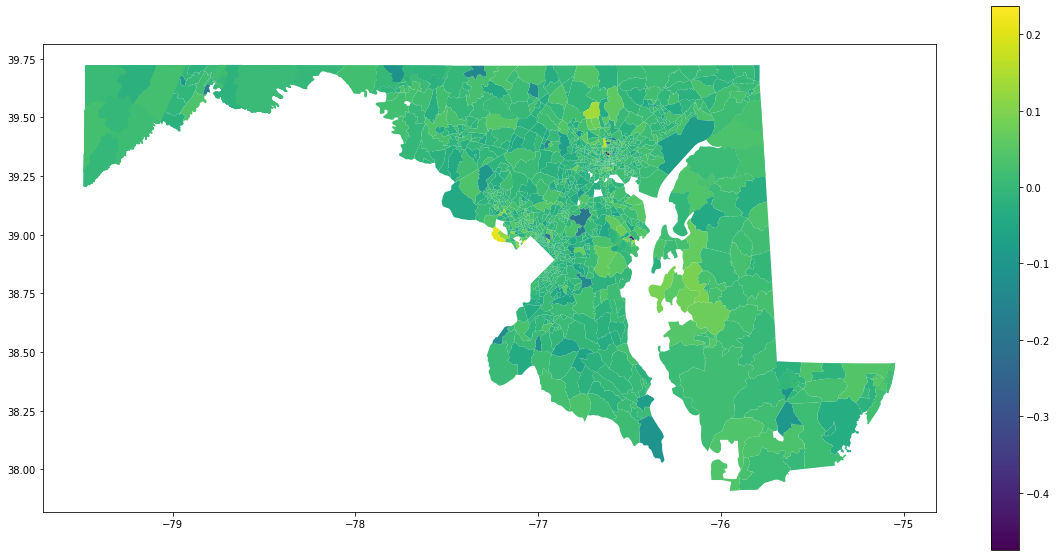

In [184]:
# extract residuals and plot them for counties
#lag 
D_Shp_1['lag_gas2016_u'] = lag_gas2016.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('lag_gas2016_u', legend=True, ax=ax)


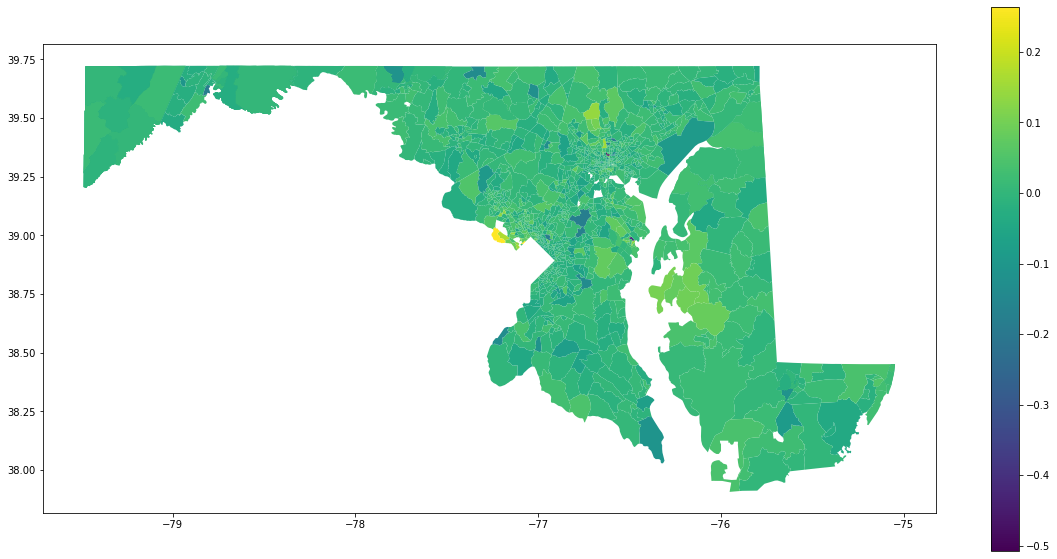

In [185]:
#error
D_Shp_1['error_gas2016_U'] = error_gas2016.u
# plot the residuals
fig, ax = plt.subplots(figsize=(20,10))
D_Shp_1.plot('error_gas2016_U', legend=True, ax=ax)

In [186]:
#Moran's I for the residuals from the lag model

#lag
lag_moran = Moran(D_Shp_1['lag_gas2016_u'] ,w)
print(lag_moran.I, lag_moran.p_sim)

0.0024431972059732743 0.412


In [187]:
#error
Err_moran = Moran(D_Shp_1['error_gas2016_U'] ,w)
print(Err_moran.I, Err_moran.p_sim)

0.148751872054562 0.001


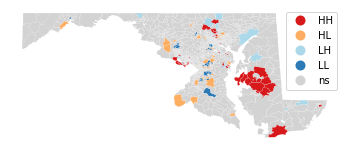

In [188]:
# hot and cold spots

#lag
local_m_lag= Moran_Local(D_Shp_1['lag_gas2016_u'], w)

lisa_cluster(local_m_lag, D_Shp_1);

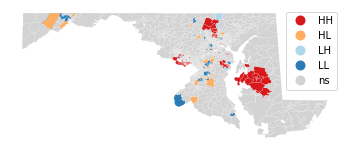

In [189]:
#error
local_m_err= Moran_Local(D_Shp_1['error_gas2016_U'], w)

lisa_cluster(local_m_err, D_Shp_1);

In [190]:
#reorganize data

y = D_Shp_1['Sadnesss_2016'].values.reshape((-1,1))
X = D_Shp_1[cols_2016_input_sad].values

In [191]:
#calibrate OLS using PySAL

ols_results_sad_2016 = spreg.OLS(y, X, w, spat_diag=True, name_x=names_gas)
print(ols_results_sad_2016.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.5456                Number of Variables   :           7
S.D. dependent var  :      0.1780                Degrees of Freedom    :        1485
R-squared           :      0.4529
Adjusted R-squared  :      0.4507
Sum squared residual:      25.855                F-statistic           :    204.9048
Sigma-square        :       0.017                Prob(F-statistic)     :  1.804e-190
S.E. of regression  :       0.132                Log likelihood        :     908.256
Sigma-square ML     :       0.017                Akaike info criterion :   -1802.513
S.E of regression ML:      0.1316                Schwarz criterion     :   -1765.357

-----------------------------------------------------------------------------

In [192]:
#calibrate lag model

lag_sad2016 = spreg.ML_Lag(y, X, w, name_x=names_sad)
print(lag_sad2016.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.5456                Number of Variables   :           8
S.D. dependent var  :      0.1780                Degrees of Freedom    :        1484
Pseudo R-squared    :      0.8184
Spatial Pseudo R-squared:  0.5014
Sigma-square ML     :       0.006                Log likelihood        :    1607.008
S.E of regression   :       0.076                Akaike info criterion :   -3198.017
                                                 Schwarz criterion     :   -3155.554

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [193]:
#calibrate error model

error_sad2016 = spreg.ML_Error(y, X, w, name_x=names_sad)
print(error_sad2016.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1492
Mean dependent var  :      0.5456                Number of Variables   :           7
S.D. dependent var  :      0.1780                Degrees of Freedom    :        1485
Pseudo R-squared    :      0.3711
Sigma-square ML     :       0.006                Log likelihood        :    1600.664
S.E of regression   :       0.075                Akaike info criterion :   -3187.328
                                                 Schwarz criterion     :   -3150.173

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [195]:
#######################################################

In [196]:
# Morans I for Sadness
m_sadness = Moran(D_Shp_1['Sadnesss_2020'], w)
print(m_sadness.I, m_sadness.p_sim)

0.6683766060869625 0.001


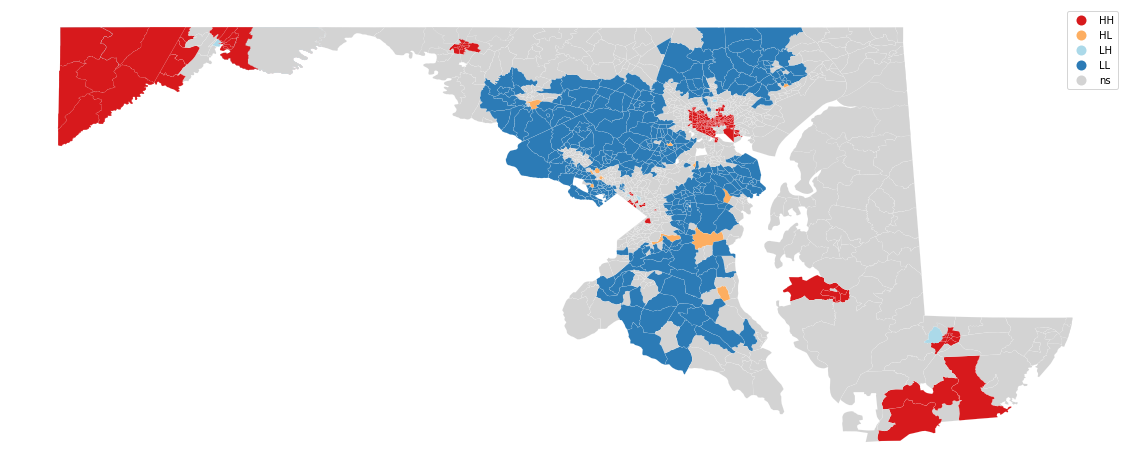

In [197]:
local_m_sadness= Moran_Local(D_Shp_1['Sadnesss_2020'], w)

lisa_cluster(local_m_sadness, D_Shp_1,figsize=(20,10));

In [197]:
# extract the coordinates for the centroids from the county geometries
y = D_Shp_1['Used_gas_2020'].values.reshape((-1,1))
X = np.hstack([D_Shp_1[cols_2020_input_gas].values])
D_Shp_1['X'] = D_Shp.apply(lambda row: row.geometry.centroid.coords[0][0], axis=1)
D_Shp_1['Y'] = D_Shp.apply(lambda row: row.geometry.centroid.coords[0][1], axis=1)
u = np.array(D_Shp_1['X']).reshape(-1,1)
v =  np.array(D_Shp_1['Y']).reshape(-1,1)
coords = list(zip(u,v))

In [198]:
import warnings
warnings.filterwarnings('ignore')

In [434]:
#Calibrate GWR

gwr_selector = Sel_BW(coords, y, X)
gwr_bw = gwr_selector.search()
print(gwr_bw)
gwr_model = GWR(coords, y,X, gwr_bw)
gwr_results = gwr_model.fit()

141.0


In [435]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.853
Log-likelihood:                                                    2552.486
AIC:                                                              -5090.972
AICc:                                                             -5088.875
BIC:                                                             -10849.338
R2:                                                                   0.772
Adj. R2:                                                              0.771

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [202]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector = Sel_BW(coords, y, X, multi=True)
mgwr_bw = mgwr_selector.search()

print(mgwr_bw) 
mgwr_model = MGWR(coords, y, X, mgwr_selector)
mgwr_results = mgwr_model.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[1491.   43. 1491.  122. 1491.  807.  106.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [203]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.853
Log-likelihood:                                                    2552.486
AIC:                                                              -5090.972
AICc:                                                             -5088.875
BIC:                                                             -10849.338
R2:                                                                   0.772
Adj. R2:                                                              0.771

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [204]:
###########2019

In [438]:
# extract the coordinates for the centroids from the county geometries
y_2019 = D_Shp_1['Used_gas_2019'].values.reshape((-1,1))
X_2019 = np.hstack([D_Shp_1[cols_2019_input_gas].values])


In [439]:
#Calibrate GWR

gwr_selector_2019 = Sel_BW(coords, y_2019, X_2019)
gwr_bw_2019 = gwr_selector_2019.search()
print(gwr_bw_2019)
gwr_model_2019 = GWR(coords, y_2019,X_2019, gwr_bw_2019)
gwr_results_2019 = gwr_model_2019.fit()

132.0


In [440]:
gwr_results_2019.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.824
Log-likelihood:                                                    2560.184
AIC:                                                              -5106.369
AICc:                                                             -5104.271
BIC:                                                             -10849.367
R2:                                                                   0.774
Adj. R2:                                                              0.773

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [441]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2019 = Sel_BW(coords, y_2019, X_2019, multi=True)
mgwr_bw_2019 = mgwr_selector_2019.search()

print(mgwr_bw_2019) 
mgwr_model_2019 = MGWR(coords, y_2019, X_2019, mgwr_selector_2019)
mgwr_results_2019 = mgwr_model_2019.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[1491.   43.  882.  142. 1491.  973.  140.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [442]:
mgwr_results_2019.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.824
Log-likelihood:                                                    2560.184
AIC:                                                              -5106.369
AICc:                                                             -5104.271
BIC:                                                             -10849.367
R2:                                                                   0.774
Adj. R2:                                                              0.773

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [443]:
#########2018

In [444]:
# extract the coordinates for the centroids from the county geometries
y_2018 = D_Shp_1['Used_gas_2018'].values.reshape((-1,1))
X_2018 = np.hstack([D_Shp_1[cols_2018_input_gas].values])


In [445]:
#Calibrate GWR

gwr_selector_2018 = Sel_BW(coords, y_2018, X_2018)
gwr_bw_2018 = gwr_selector_2018.search()
print(gwr_bw_2018)
gwr_model_2018 = GWR(coords, y_2018,X_2018, gwr_bw_2018)
gwr_results_2018 = gwr_model_2018.fit()

132.0


In [446]:
gwr_results_2018.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.739
Log-likelihood:                                                    2583.061
AIC:                                                              -5152.123
AICc:                                                             -5150.026
BIC:                                                             -10849.452
R2:                                                                   0.781
Adj. R2:                                                              0.780

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [447]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2018 = Sel_BW(coords, y_2018, X_2018, multi=True)
mgwr_bw_2018 = mgwr_selector_2018.search()

print(mgwr_bw_2018) 
mgwr_model_2018 = MGWR(coords, y_2018, X_2018, mgwr_selector_2018)
mgwr_results_2018 = mgwr_model_2018.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[1491.   43.  938.  142. 1491.  855.  139.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [448]:
mgwr_results_2018.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.739
Log-likelihood:                                                    2583.061
AIC:                                                              -5152.123
AICc:                                                             -5150.026
BIC:                                                             -10849.452
R2:                                                                   0.781
Adj. R2:                                                              0.780

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [449]:
#########2017

In [450]:
# extract the coordinates for the centroids from the county geometries
y_2017 = D_Shp_1['Used_gas_2017'].values.reshape((-1,1))
X_2017 = np.hstack([D_Shp_1[cols_2017_input_gas].values])


In [451]:
#Calibrate GWR

gwr_selector_2017 = Sel_BW(coords, y_2017, X_2017)
gwr_bw_2017 = gwr_selector_2017.search()
print(gwr_bw_2017)
gwr_model_2017 = GWR(coords, y_2017,X_2017, gwr_bw_2017)
gwr_results_2017 = gwr_model_2017.fit()

118.0


In [452]:
gwr_results_2017.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.665
Log-likelihood:                                                    2603.513
AIC:                                                              -5193.027
AICc:                                                             -5190.930
BIC:                                                             -10849.527
R2:                                                                   0.792
Adj. R2:                                                              0.792

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [453]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2017 = Sel_BW(coords, y_2017, X_2017, multi=True)
mgwr_bw_2017 = mgwr_selector_2017.search()

print(mgwr_bw_2017) 
mgwr_model_2017 = MGWR(coords, y_2017, X_2017, mgwr_selector_2017)
mgwr_results_2017 = mgwr_model_2017.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[1491.   43.  938.  142. 1304.  938.  156.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [454]:
mgwr_results_2017.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.665
Log-likelihood:                                                    2603.513
AIC:                                                              -5193.027
AICc:                                                             -5190.930
BIC:                                                             -10849.527
R2:                                                                   0.792
Adj. R2:                                                              0.792

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [455]:
########2016##############

In [194]:
# extract the coordinates for the centroids from the county geometries
y_2016 = D_Shp_1['Used_gas_2016'].values.reshape((-1,1))
X_2016 = np.hstack([D_Shp_1[cols_2016_input_gas].values])


In [457]:
#Calibrate GWR

gwr_selector_2016 = Sel_BW(coords, y_2016, X_2016)
gwr_bw_2016 = gwr_selector_2016.search()
print(gwr_bw_2016)
gwr_model_2016 = GWR(coords, y_2016,X_2016, gwr_bw_2016)
gwr_results_2016 = gwr_model_2016.fit()

124.0


In [458]:
gwr_results_2016.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.423
Log-likelihood:                                                    2674.324
AIC:                                                              -5334.648
AICc:                                                             -5332.551
BIC:                                                             -10849.768
R2:                                                                   0.798
Adj. R2:                                                              0.797

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [199]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2016 = Sel_BW(coords, y_2016, X_2016, multi=True)
mgwr_bw_2016 = mgwr_selector_2016.search()

print(mgwr_bw_2016) 
mgwr_model_2016 = MGWR(coords, y_2016, X_2016, mgwr_selector_2016)
mgwr_results_2016 = mgwr_model_2016.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[1491.   44. 1036.   99. 1491.  870.  140.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [200]:
mgwr_results_2016

In [201]:
mgwr_results_2016.summary()


Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              2.423
Log-likelihood:                                                    2674.324
AIC:                                                              -5334.648
AICc:                                                             -5332.551
BIC:                                                             -10849.768
R2:                                                                   0.798
Adj. R2:                                                              0.797

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
#######################################################

In [ ]:
########################GWR for sadness##############

In [202]:
# extract the coordinates for the centroids from the county geometries
y = D_Shp_1['Sadnesss_2020'].values.reshape((-1,1))
X = np.hstack([D_Shp_1[cols_2020_input_sad].values])
D_Shp_1['X'] = D_Shp_1.apply(lambda row: row.geometry.centroid.coords[0][0], axis=1)
D_Shp_1['Y'] = D_Shp_1.apply(lambda row: row.geometry.centroid.coords[0][1], axis=1)
u = np.array(D_Shp_1['X']).reshape(-1,1)
v =  np.array(D_Shp_1['Y']).reshape(-1,1)
coords = list(zip(u,v))

In [203]:
import warnings
warnings.filterwarnings('ignore')

In [204]:
#Calibrate GWR

gwr_selector = Sel_BW(coords, y, X)
gwr_bw = gwr_selector.search()
print(gwr_bw)
gwr_model = GWR(coords, y,X, gwr_bw)
gwr_results = gwr_model.fit()

147.0


In [205]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             17.974
Log-likelihood:                                                    1179.469
AIC:                                                              -2342.937
AICc:                                                             -2340.816
BIC:                                                             -10826.909
R2:                                                                   0.646
Adj. R2:                                                              0.645

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [218]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector = Sel_BW(coords, y, X, multi=True)
mgwr_bw = mgwr_selector.search()

print(mgwr_bw) 
mgwr_model = MGWR(coords, y, X, mgwr_selector)
mgwr_results = mgwr_model.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[  43.  981.  876.  927. 1490.  271. 1491.  726.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [219]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             17.974
Log-likelihood:                                                    1179.469
AIC:                                                              -2342.937
AICc:                                                             -2340.816
BIC:                                                             -10826.909
R2:                                                                   0.646
Adj. R2:                                                              0.645

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
###########2019

In [206]:
# extract the coordinates for the centroids from the county geometries
y_2019 = D_Shp_1['Sadnesss_2019'].values.reshape((-1,1))
X_2019 = np.hstack([D_Shp_1[cols_2019_input_sad].values])


In [207]:
#Calibrate GWR

gwr_selector_2019 = Sel_BW(coords, y_2019, X_2019)
gwr_bw_2019 = gwr_selector_2019.search()
print(gwr_bw_2019)
gwr_model_2019 = GWR(coords, y_2019,X_2019, gwr_bw_2019)
gwr_results_2019 = gwr_model_2019.fit()

145.0


In [208]:
gwr_results_2019.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             14.083
Log-likelihood:                                                    1361.477
AIC:                                                              -2706.954
AICc:                                                             -2704.833
BIC:                                                             -10830.800
R2:                                                                   0.713
Adj. R2:                                                              0.712

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [220]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2019 = Sel_BW(coords, y_2019, X_2019, multi=True)
mgwr_bw_2019 = mgwr_selector_2019.search()

print(mgwr_bw_2019) 
mgwr_model_2019 = MGWR(coords, y_2019, X_2019, mgwr_selector_2019)
mgwr_results_2019 = mgwr_model_2019.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[  43.  909.  175.  403. 1490.   90. 1491.  808.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [221]:
mgwr_results_2019.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             14.083
Log-likelihood:                                                    1361.477
AIC:                                                              -2706.954
AICc:                                                             -2704.833
BIC:                                                             -10830.800
R2:                                                                   0.713
Adj. R2:                                                              0.712

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
#########2018

In [209]:
# extract the coordinates for the centroids from the county geometries
y_2018 = D_Shp_1['Sadnesss_2018'].values.reshape((-1,1))
X_2018 = np.hstack([D_Shp_1[cols_2018_input_sad].values])


In [210]:
#Calibrate GWR

gwr_selector_2018 = Sel_BW(coords, y_2018, X_2018)
gwr_bw_2018 = gwr_selector_2018.search()
print(gwr_bw_2018)
gwr_model_2018 = GWR(coords, y_2018,X_2018, gwr_bw_2018)
gwr_results_2018 = gwr_model_2018.fit()

146.0


In [211]:
gwr_results_2018.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              9.179
Log-likelihood:                                                    1680.801
AIC:                                                              -3347.602
AICc:                                                             -3345.505
BIC:                                                             -10843.012
R2:                                                                   0.802
Adj. R2:                                                              0.801

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [222]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2018 = Sel_BW(coords, y_2018, X_2018, multi=True)
mgwr_bw_2018 = mgwr_selector_2018.search()

print(mgwr_bw_2018) 
mgwr_model_2018 = MGWR(coords, y_2018, X_2018, mgwr_selector_2018)
mgwr_results_2018 = mgwr_model_2018.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[  44. 1148.  986. 1490. 1485.  254.  513.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [223]:
mgwr_results_2018.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              9.179
Log-likelihood:                                                    1680.801
AIC:                                                              -3347.602
AICc:                                                             -3345.505
BIC:                                                             -10843.012
R2:                                                                   0.802
Adj. R2:                                                              0.801

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
#########2017

In [212]:
# extract the coordinates for the centroids from the county geometries
y_2017 = D_Shp_1['Sadnesss_2017'].values.reshape((-1,1))
X_2017 = np.hstack([D_Shp_1[cols_2017_input_sad].values])


In [213]:
#Calibrate GWR

gwr_selector_2017 = Sel_BW(coords, y_2017, X_2017)
gwr_bw_2017 = gwr_selector_2017.search()
print(gwr_bw_2017)
gwr_model_2017 = GWR(coords, y_2017,X_2017, gwr_bw_2017)
gwr_results_2017 = gwr_model_2017.fit()

133.0


In [214]:
gwr_results_2017.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             10.963
Log-likelihood:                                                    1548.312
AIC:                                                              -3082.624
AICc:                                                             -3080.527
BIC:                                                             -10841.228
R2:                                                                   0.770
Adj. R2:                                                              0.769

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [224]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2017 = Sel_BW(coords, y_2017, X_2017, multi=True)
mgwr_bw_2017 = mgwr_selector_2017.search()

print(mgwr_bw_2017) 
mgwr_model_2017 = MGWR(coords, y_2017, X_2017, mgwr_selector_2017)
mgwr_results_2017 = mgwr_model_2017.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[  43.  634.  144. 1490.   80. 1491. 1491.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [225]:
mgwr_results_2017.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             10.963
Log-likelihood:                                                    1548.312
AIC:                                                              -3082.624
AICc:                                                             -3080.527
BIC:                                                             -10841.228
R2:                                                                   0.770
Adj. R2:                                                              0.769

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
########2016##############

In [215]:
# extract the coordinates for the centroids from the county geometries
y_2016 = D_Shp_1['Sadnesss_2016'].values.reshape((-1,1))
X_2016 = np.hstack([D_Shp_1[cols_2016_input_sad].values])


In [216]:
#Calibrate GWR

gwr_selector_2016 = Sel_BW(coords, y_2016, X_2016)
gwr_bw_2016 = gwr_selector_2016.search()
print(gwr_bw_2016)
gwr_model_2016 = GWR(coords, y_2016,X_2016, gwr_bw_2016)
gwr_results_2016 = gwr_model_2016.fit()

71.0


In [217]:
gwr_results_2016.summary()

Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             25.855
Log-likelihood:                                                     908.256
AIC:                                                              -1802.513
AICc:                                                             -1800.415
BIC:                                                             -10826.336
R2:                                                                   0.453
Adj. R2:                                                              0.451

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [226]:
#Calibrate MGWR - this will take around 20 to 30 minutes...Feel free To take a break with some coffee or tea!

mgwr_selector_2016 = Sel_BW(coords, y_2016, X_2016, multi=True)
mgwr_bw_2016 = mgwr_selector_2016.search()

print(mgwr_bw_2016) 
mgwr_model_2016 = MGWR(coords, y_2016, X_2016, mgwr_selector_2016)
mgwr_results_2016 = mgwr_model_2016.fit()


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[ 43. 171. 122. 114. 712.  46.  43.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [227]:
mgwr_results_2016

In [228]:
mgwr_results_2016.summary()


Model type                                                         Gaussian
Number of observations:                                                1492
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             25.855
Log-likelihood:                                                     908.256
AIC:                                                              -1802.513
AICc:                                                             -1800.415
BIC:                                                             -10826.336
R2:                                                                   0.453
Adj. R2:                                                              0.451

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------